# Udacity Data Analyst Nanodegree - Project 5: `Pisa2012` Results Analysis - 
# Exploratory and Explanatory Data Visualisation,  by Dyke Ferber
---


## Table of contents

#### PART 1 - Data Cleaning
   1. [Import libraries](#import_lib)  
   2. [Import the dataset](#import_dataset)  
   3. [Initial Exploration](#exploration)
   4. [Data Cleaning: Tidiness and Quality](#cleaning)
   5. [Final Checkup](#checkup)
   
#### PART 2 - Exploratory Data Analysis
   1. [Country Distributions](#countries)     
   2. [Variable Correlations](#corr)
   3. [Univariate Exploratory Data Analysis: Math, Science and Reading](#univar_EDA)
   4. [Univariate Exploratory Data Analysis: Study times](#study_times)
   5. [Total Learning Time: Boys vs girls](#total_learning)
   6. [Item possession and score results](#possessions)
   7. [Counts of phones, cars, bathrooms and study results](#counts)
   8. [Count items and scores correlations](#Correlations_Count_Grade)
   9. [Book numbers and scores](#Books_vs_results)
   10. [Are lazy kids worse at the tests](#Truancy)
   11. [Which countries perform best in PISA2012?](#SmartestCountries)

### The `PISA 2012` dataset: A brief introduction
---

The PISA survey (Programme for International Student Assessment) is an international survey dedicated to compare the level of educational fitness of school students around the age of 15 years that are about to graduate. Therein, PISA does not aim to assess theoretical knowledge in different domains like biology, chemistry and languages, however asks how well the teenagers can apply what they have learned throughout their school time to real-world situations.  

The dataset we used here contains the full results from 2012. It holds 485489 entries (observations) and  635 features (variables). It is therefore an extraordinarily large dataset and we will therefore reduce it in order to answer some key questions in this dataset.  

While many other Udacity Students followed the most obvious question, wheter the amount of time and effort spend learning correlates to overall good test results, I herein want to ask 2 key questions. 1: wether the financial situation at home has anything to do with the outcome in the test statistics, and 2. if students that regularly skip school perform worse (I almost never skipped lessons and wonder if I should have done this in order to sometimes evade some boring hours without sacrifying my test performance) ... 

<a id='import_lib'></a>
### I. Import libraries
---
Import the required libraries. We will use pandas, seaborn and matplotlib for data visualisations, numpy for some statistical computing, zipfile to extract the initial .zip file downloaded from Udacity and plot inline with the magic % command.

In [1]:
import numpy as np
import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# copied from https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<a id='import_dataset'></a>
### II. Import the dataset
---
Initially, extract the zipfile, then import the dataframe as a whole which is quite computationally expensive as well as the explanations dictionary.
The entire .zip-file is several gigabites in size (2.3 GB), so uploading to github is not possible. However the dataset can be obtained via https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip.


In [3]:
with zipfile.ZipFile(os.path.join(os.getcwd(), "pisa2012.csv.zip")) as zipped:
    zipped.extractall()

In [4]:
# read in the corresponding dataframes

# columns in the pisa2012 dataset are short encoded, the matching descriptions (true labels) are contained in the pisadict2012 dataframe. 
# We will use this to create a dictionary for rapid look-ups of column descriptions

pisa_df = pd.read_csv("pisa2012.csv", sep=",", encoding='latin-1')
pisa_dict = pd.read_csv("pisadict2012.csv", sep=",", encoding='latin-1')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<a id='exploration'></a>
### III. Initial Exploration
---
Explore the dataset programmatically to identify any data tidiness or quality issues that we need to adress before starting exploratory data analysis. Also reduce the dataset size to only keep samples or variables that are of interest in the further exploration.
For data wrangling, though computationally intense, create copies of both datasets.

In [35]:
# copy the datasets, in case we mess up while cleaning we can directly refer to this line instead of re-reading them into memory

pisa = pisa_df.copy()
pdict = pisa_dict.copy()

In [36]:
# explore some rows

pisa.head()

Unnamed: 0      CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  \
0           1  Albania     80000  ALB0006  Non-OECD  Albania         1   
1           2  Albania     80000  ALB0006  Non-OECD  Albania         1   
2           3  Albania     80000  ALB0006  Non-OECD  Albania         1   
3           4  Albania     80000  ALB0006  Non-OECD  Albania         1   
4           5  Albania     80000  ALB0006  Non-OECD  Albania         1   

   STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
0        1       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
1        2       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
2        3        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
3        4        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
4        5        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   

   W_FSTR79 W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
0    4.3389  13.0829       19        1     0.2098  22NOV13  
1    4.3389  13.0829       19        1     0.2098  22NOV13  
2    4.2436  12.7307       19        1     0.1999  22NOV13  
3    4.2436  12.7307       19        1     0.1999  22NOV13  
4    4.2436  12.7307       19        1     0.1999  22NOV13  

[5 rows x 636 columns]

In [37]:
pisa.describe()

Unnamed: 0      SUBNATIO       SCHOOLID        STIDSTD  \
count  485490.000000  4.854900e+05  485490.000000  485490.000000   
mean   242745.500000  4.315457e+06     240.152197    6134.066201   
std    140149.035432  2.524434e+06     278.563016    6733.144944   
min         1.000000  8.000000e+04       1.000000       1.000000   
25%    121373.250000  2.030000e+06      61.000000    1811.000000   
50%    242745.500000  4.100000e+06     136.000000    3740.000000   
75%    364117.750000  6.880000e+06     291.000000    7456.000000   
max    485490.000000  8.580000e+06    1471.000000   33806.000000   

             ST01Q01        ST02Q01        ST03Q01        ST03Q02  \
count  485490.000000  485438.000000  485490.000000  485490.000000   
mean        9.813323       2.579260       6.558512    1996.070061   
std         3.734726       2.694013       3.705244       0.255250   
min         7.000000       1.000000       1.000000    1996.000000   
25%         9.000000       1.000000       4.000000    1996.000000   
50%        10.000000       1.000000       7.000000    1996.000000   
75%        10.000000       3.000000       9.000000    1996.000000   
max        96.000000      25.000000      99.000000    1997.000000   

             ST06Q01       ST115Q01  ...       W_FSTR74       W_FSTR75  \
count  457994.000000  479269.000000  ...  485490.000000  485490.000000   
mean        6.148963       1.265356  ...      50.844201      51.020378   
std         0.970693       0.578992  ...     120.684726     122.946533   
min         4.000000       1.000000  ...       0.292900       0.292900   
25%         6.000000       1.000000  ...       4.660300       4.664800   
50%         6.000000       1.000000  ...      13.637700      13.698900   
75%         7.000000       1.000000  ...      41.233500      41.512500   
max        16.000000       4.000000  ...    2476.566800    4155.283000   

            W_FSTR76       W_FSTR77       W_FSTR78       W_FSTR79  \
count  485490.000000  485490.000000  485490.000000  485490.000000   
mean       50.943149      50.685275      51.019842      50.540724   
std       121.170883     119.267686     122.981541     119.479516   
min         0.292900       0.292900       0.292900       0.292900   
25%         4.643100       4.667000       4.675200       4.651850   
50%        13.611700      13.672100      13.731100      13.582000   
75%        41.695200      41.097300      41.189600      41.290925   
max      3743.450100    3232.163700    3904.868100    3607.478300   

            W_FSTR80       WVARSTRR       VAR_UNIT     SENWGT_STU  
count  485490.000000  485490.000000  485490.000000  485490.000000  
mean       50.721164      40.013920       1.531189       0.140054  
std       119.799018      22.951264       0.539759       0.137864  
min         0.292900       1.000000       1.000000       0.000500  
25%         4.660300      20.000000       1.000000       0.037800  
50%        13.600200      40.000000       2.000000       0.145200  
75%        41.356000      60.000000       2.000000       0.199900  
max      3412.174100      80.000000       3.000000       5.095500  

[8 rows x 268 columns]

In [38]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [39]:
pisa.shape

(485490, 636)

The entire dataset contains almost 500.000 observations and 635 attributes. We will need to drop a large fraction of columns thats not in our main focus of interest. This will largely reduce the dataframe size, reduce memory usage and increase the speed of exploration.

As handling the dictionary-like style of the `pdict` dataframe is quite unpractical, create a dictionary `pisadict` for rapid lookups between column abbreviations and their respective meaning. This should increase comfort in cleaning the dataset.

In [40]:
# create a dictionary
# before clean up the key-value pair names in the pdict dataframe

pdict.rename(columns={"Unnamed: 0":"key",
             "x":"value"}, inplace=True)

pisadict = dict(zip(pdict.key, pdict.value))

In [41]:
pdict.head(10)

key                                              value
0       CNT                           Country code 3-character
1  SUBNATIO  Adjudicated sub-region code 7-digit code (3-di...
2   STRATUM  Stratum ID 7-character (cnt + region ID + orig...
3      OECD                                       OECD country
4        NC                       National Centre 6-digit Code
5  SCHOOLID  School ID 7-digit (region ID + stratum ID + 3-...
6   STIDSTD                                         Student ID
7   ST01Q01                                International Grade
8   ST02Q01                           National Study Programme
9   ST03Q01                                      Birth - Month

In [42]:
len(pisadict)

635

The entire dataframe contains 635 different columns, almost all of which are not in our main focus for this task. Therefore I manually selected column IDs as the index of the pdict dataframe using numpys `.r_[ ]` method to create a slice of column indices to retrieve from the pdict keys.

In [43]:
# numpy.r_[] is a method to create an array by inserting numbers or slices. This is very practical as we dont have to type in manually all values for instance in the range from 43:57 (see below)
# we will use these values to later extract the matching columns from our dataframe

relevant_keys = np.r_[0,6,7,9:12, 17:20, 26, 31, 32, 37, 43:57,60:66, 140:145, 460, 466, 476]
relevant_keys

array([  0,   6,   7,   9,  10,  11,  17,  18,  19,  26,  31,  32,  37,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  60,  61,  62,  63,  64,  65, 140, 141, 142, 143, 144, 460,
       466, 476])

In [44]:
# from the index of our pdict dataframe, select the rows that are stored in "relevant_keys"

columns = pdict.iloc[relevant_keys]["key"].to_list()
columns[:10]

['CNT',
 'STIDSTD',
 'ST01Q01',
 'ST03Q01',
 'ST03Q02',
 'ST04Q01',
 'ST08Q01',
 'ST09Q01',
 'ST115Q01',
 'ST13Q01']

Also the relevant columns containing students `math, science and reading score` are in the dataset. All of them contain the regex `PV` (possible value) and can be extracted by some simple logic. 

In [45]:
# find the corresponding items in the pisadict keys, and save them in the columns list

for key, value in pisadict.items():
    if "PV" in key and "subscale" not in value:
        columns.append(key)

In [46]:
print(columns)

['CNT', 'STIDSTD', 'ST01Q01', 'ST03Q01', 'ST03Q02', 'ST04Q01', 'ST08Q01', 'ST09Q01', 'ST115Q01', 'ST13Q01', 'ST15Q01', 'ST17Q01', 'ST19Q01', 'ST26Q01', 'ST26Q02', 'ST26Q03', 'ST26Q04', 'ST26Q05', 'ST26Q06', 'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10', 'ST26Q11', 'ST26Q12', 'ST26Q13', 'ST26Q14', 'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q04', 'ST27Q05', 'ST28Q01', 'ST57Q01', 'ST57Q02', 'ST57Q03', 'ST57Q04', 'ST57Q05', 'LMINS', 'MMINS', 'SMINS', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']


In [47]:
# finally, we can now slice our pisa dataframe using .loc[row, col]
# we select every row (:) and the matching columns that are stored in the columns list

pisa = pisa.loc[:,columns]

In [48]:
pisa.shape

(485490, 56)

In [49]:
# make sure everything went smooth, the column dimension of the pisa df should equal the length of the columns list
assert pisa.shape[1] == len(columns)

In [50]:
pisa.head(3)

CNT  STIDSTD  ST01Q01  ST03Q01  ST03Q02 ST04Q01             ST08Q01  \
0  Albania        1       10        2     1996  Female              None     
1  Albania        2       10        2     1996  Female  One or two times     
2  Albania        3        9        9     1996  Female              None     

  ST09Q01  ST115Q01                ST13Q01  ...   PV1READ   PV2READ   PV3READ  \
0  None         1.0      <ISCED level 3A>   ...  249.5762  254.3420  406.8496   
1  None         1.0      <ISCED level 3A>   ...  406.2936  349.8975  400.7334   
2  None         1.0  <ISCED level 3B, 3C>   ...  401.2100  404.3872  387.7067   

    PV4READ   PV5READ   PV1SCIE   PV2SCIE   PV3SCIE   PV4SCIE   PV5SCIE  
0  175.7053  218.5981  341.7009  408.8400  348.2283  367.8105  392.9877  
1  369.7553  396.7618  548.9929  471.5964  471.5964  443.6218  454.8116  
2  431.3938  401.2100  499.6643  428.7952  492.2044  512.7191  499.6643  

[3 rows x 56 columns]

Check for `NaN` values in our dataset, that now contains only 56 columns (variables). Also check out the corresponding datatypes.

In [51]:
# print out the number of missing values per column, as well as the datatype
# in case the datatype is object / string, we most likely have no chance to fill it up with for instance some test statistic
# in case its numeric we could use the mean to impute nan values

[print("Col: ", col, "NA: ", pisa[col].isna().sum(), "/////", "Dtype:", pisa[col].dtype) for col in columns];

Col:  CNT NA:  0 ///// Dtype: object
Col:  STIDSTD NA:  0 ///// Dtype: int64
Col:  ST01Q01 NA:  0 ///// Dtype: int64
Col:  ST03Q01 NA:  0 ///// Dtype: int64
Col:  ST03Q02 NA:  0 ///// Dtype: int64
Col:  ST04Q01 NA:  0 ///// Dtype: object
Col:  ST08Q01 NA:  6347 ///// Dtype: object
Col:  ST09Q01 NA:  6359 ///// Dtype: object
Col:  ST115Q01 NA:  6221 ///// Dtype: float64
Col:  ST13Q01 NA:  27511 ///// Dtype: object
Col:  ST15Q01 NA:  17739 ///// Dtype: object
Col:  ST17Q01 NA:  42229 ///// Dtype: object
Col:  ST19Q01 NA:  34080 ///// Dtype: object
Col:  ST26Q01 NA:  12411 ///// Dtype: object
Col:  ST26Q02 NA:  15797 ///// Dtype: object
Col:  ST26Q03 NA:  13470 ///// Dtype: object
Col:  ST26Q04 NA:  11613 ///// Dtype: object
Col:  ST26Q05 NA:  22312 ///// Dtype: object
Col:  ST26Q06 NA:  12308 ///// Dtype: object
Col:  ST26Q07 NA:  19630 ///// Dtype: object
Col:  ST26Q08 NA:  18396 ///// Dtype: object
Col:  ST26Q09 NA:  18241 ///// Dtype: object
Col:  ST26Q10 NA:  14248 ///// Dtype: objec

In case we can remove `NaN` values from `float`type columns, replace them with the .mean( ) of the column.

In [52]:
for col in columns:
    if pisa[col].dtype == "float64":
        pisa[col].fillna(pisa[col].mean())

In [53]:
# check again
[print("Col: ", col, "NA: ", pisa[col].isna().sum(), "/////", "Dtype:", pisa[col].dtype) for col in columns];

Col:  CNT NA:  0 ///// Dtype: object
Col:  STIDSTD NA:  0 ///// Dtype: int64
Col:  ST01Q01 NA:  0 ///// Dtype: int64
Col:  ST03Q01 NA:  0 ///// Dtype: int64
Col:  ST03Q02 NA:  0 ///// Dtype: int64
Col:  ST04Q01 NA:  0 ///// Dtype: object
Col:  ST08Q01 NA:  6347 ///// Dtype: object
Col:  ST09Q01 NA:  6359 ///// Dtype: object
Col:  ST115Q01 NA:  6221 ///// Dtype: float64
Col:  ST13Q01 NA:  27511 ///// Dtype: object
Col:  ST15Q01 NA:  17739 ///// Dtype: object
Col:  ST17Q01 NA:  42229 ///// Dtype: object
Col:  ST19Q01 NA:  34080 ///// Dtype: object
Col:  ST26Q01 NA:  12411 ///// Dtype: object
Col:  ST26Q02 NA:  15797 ///// Dtype: object
Col:  ST26Q03 NA:  13470 ///// Dtype: object
Col:  ST26Q04 NA:  11613 ///// Dtype: object
Col:  ST26Q05 NA:  22312 ///// Dtype: object
Col:  ST26Q06 NA:  12308 ///// Dtype: object
Col:  ST26Q07 NA:  19630 ///// Dtype: object
Col:  ST26Q08 NA:  18396 ///// Dtype: object
Col:  ST26Q09 NA:  18241 ///// Dtype: object
Col:  ST26Q10 NA:  14248 ///// Dtype: objec

In [54]:
# check if there are duplicates, that we should get rid of
pisa.duplicated().any()

False

Rename column abbreviations with their true name, then shorten it.

In [55]:
# use our pisadict to rename the columns to something more informative
# we give pisadit the key (abbreviation) and recieve the column description

for col in pisa.columns:
    pisa.rename(columns = { col : pisadict[col] }, inplace=True)

In [56]:
pisa.columns

Index(['Country code 3-character', 'Student ID', 'International Grade',
       'Birth - Month', 'Birth -Year', 'Gender', 'Truancy - Late for School',
       'Truancy - Skip whole school day',
       'Truancy - Skip classes within school day', 'Mother<Highest Schooling>',
       'Mother Current Job Status', 'Father<Highest Schooling>',
       'Father Current Job Status', 'Possessions - desk',
       'Possessions - own room', 'Possessions - study place',
       'Possessions - computer', 'Possessions - software',
       'Possessions - Internet', 'Possessions - literature',
       'Possessions - poetry', 'Possessions - art', 'Possessions - textbooks',
       'Possessions - <technical reference books>', 'Possessions - dictionary',
       'Possessions - dishwasher', 'Possessions - <DVD>',
       'How many - cellular phones', 'How many - televisions',
       'How many - computers', 'How many - cars',
       'How many - rooms bath or shower', 'How many books at home',
       'Out-of-School Stu

The new column labels, though more descriptive, are way too long for practical usage, contain spaces and are bad practice for plotting later. We manually asssign new labels with " _ " instead of spaces and shortened the labels.

In [57]:
rename_dict = {'Country code 3-character': "Country_Code", 
               'Student ID': "Student_ID", 
               'International Grade': "International_Grade",
               'Birth - Month': "Birth_Month", 
               'Birth -Year': "Birth_Year", 
               'Gender':"Sex", 
               'Truancy - Late for School': "Late_For_School",
               'Truancy - Skip whole school day': "Skip_Whole_School_Day",
               'Truancy - Skip classes within school day': "Skip_Classes_Within_School",
               'Mother<Highest Schooling>':"Mother_Highest_Schooling",
               'Mother Current Job Status':"Mother_Job_Status",
               'Father<Highest Schooling>':"Father_Highest_Schooling", 
               'Father Current Job Status':"Father_Job_Status",
               'Possessions - desk':"Poss_Desk", 
               'Possessions - own room':"Poss_Own_Room",
               'Possessions - study place':"Poss_Study_Place", 
               'Possessions - computer':"Poss_Computer",
               'Possessions - software':"Poss_Software", 
               'Possessions - Internet':"Poss_Internet",
               'Possessions - literature':"Poss_Literature", 
               'Possessions - poetry':"Poss_Poetry", 
               'Possessions - art':"Poss_Art",
               'Possessions - textbooks':"Poss_Textbooks", 
               'Possessions - <technical reference books>':"Poss_Technical_Ref_Book",
               'Possessions - dictionary':"Poss_Dict", 
               'Possessions - dishwasher':"Poss_Dishwasher",
               'Possessions - <DVD>':"Poss_DVD", 
               'How many - cellular phones':"Count_Cell_Phone",
               'How many - televisions':"Count_TV", 
               'How many - computers':"Count_Computer", 
               'How many - cars':"Count_Cars",
               'How many - rooms bath or shower':"Count_Bath_Rooms", 
               'How many books at home':"Count_Books",
               'Out-of-School Study Time - Homework':"Homework_Time",
               'Out-of-School Study Time - Guided Homework':"Guided_Homework_Time",
               'Out-of-School Study Time - Personal Tutor':"Personal_Tutor_Time",
               'Out-of-School Study Time - Commercial Company':"Commercial_Company_Time",
               'Out-of-School Study Time - With Parent':"Study_Time_with_Parent",
               'Learning time (minutes per week)  - <test language>':"Learn_Time_Test_Language",
               'Learning time (minutes per week)- <Mathematics>':"Learn_Time_Test_Math",
               'Learning time (minutes per week) - <Science>':"Learn_Time_Test_Science",
               'Plausible value 1 in mathematics':"Value_1_Math", 
               'Plausible value 2 in mathematics':"Value_2_Math",
               'Plausible value 3 in mathematics':"Value_3_Math", 
               'Plausible value 4 in mathematics':"Value_4_Math",
               'Plausible value 5 in mathematics':"Value_5_Math", 
               'Plausible value 1 in reading':"Value_1_Read",
               'Plausible value 2 in reading':"Value_2_Read", 
               'Plausible value 3 in reading':"Value_3_Read",
               'Plausible value 4 in reading':"Value_4_Read", 
               'Plausible value 5 in reading':"Value_5_Read",
               'Plausible value 1 in science':"Value_1_Science", 
               'Plausible value 2 in science':"Value_2_Science",
               'Plausible value 3 in science':"Value_3_Science", 
               'Plausible value 4 in science':"Value_4_Science",
               'Plausible value 5 in science':"Value_5_Science"}

pisa.rename(rename_dict, axis=1, inplace=True)

In [58]:
# check if renaming worked as expected
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 56 columns):
Country_Code                  485490 non-null object
Student_ID                    485490 non-null int64
International_Grade           485490 non-null int64
Birth_Month                   485490 non-null int64
Birth_Year                    485490 non-null int64
Sex                           485490 non-null object
Late_For_School               479143 non-null object
Skip_Whole_School_Day         479131 non-null object
Skip_Classes_Within_School    479269 non-null float64
Mother_Highest_Schooling      457979 non-null object
Mother_Job_Status             467751 non-null object
Father_Highest_Schooling      443261 non-null object
Father_Job_Status             451410 non-null object
Poss_Desk                     473079 non-null object
Poss_Own_Room                 469693 non-null object
Poss_Study_Place              472020 non-null object
Poss_Computer                 473877 non-nul

For later easier wrangling of related group of columns, store column names that match to the categories below as list type.

In [59]:
# during our exploration later we might not want to type every column name out when performind Exploratory Data Analysis. 
# Instead we might want to use a loop and plot / calculate values on groups of related features.
# Therefore append column names to lists. This isnt too difficult as related columns have related names (see the if - elif - else statements below)

In [60]:
scores = []
learning_time = []
counts = []
possessions = []
truancy = []
parents = []
base_info = []

for key, value in rename_dict.items():
    if key.startswith("Plausible"):
        scores.append(value)
    elif key.startswith("Learning") or key.startswith("Out-of-School"):
        learning_time.append(value)
    elif key.startswith("How many"):
        counts.append(value)
    elif key.startswith("Possessions"):
        possessions.append(value)
    elif key.startswith("Truancy"):
        truancy.append(value)
    elif key.startswith("Mother") or key.startswith("Father"):
        parents.append(value)
    else:
        base_info.append(value)

<a id='cleaning'></a>
### IV. Data Wrangling: Tidiness and Quality Issues
---
**Issues**:  
1. All columns in the `possessions` list are of type object (string), convert them to categoric.
2. All columns in the `counts` list contain missing information, as this is not restorable, drop rows with NaN.
3. All columns in the `counts` list are of type object (string), convert them to categoric with order (increasing).
4. The columns `Late_For_School` and `Skip_Whole_School_Day` are of type object (string), convert them to sorted categorical.
5. All columns in the `parents` list contain NaN values. As these don't appear to mean `None` (as it turns out as its own value inside this column) we cannot know what these values could mean, most likely the were not explicitly recorded as None, or the meant something totally different. In any case drop them to avoid biasing our results based on assuming their meaning.  
6. The table currently misses some statistically relevant columns like average grading or average / total learning time. Create them.  
7. `Sex` column is of type object, convert it to category.
---

1. All columns in the `possessions` list are of type object (string), convert them to categoric.

In [65]:
for pos in possessions:
    print(pos,":", pisa[pos].dtype, ".....", pisa[pos].unique())

Poss_Desk : object ..... ['Yes' nan 'No']
Poss_Own_Room : object ..... ['No' 'Yes' nan]
Poss_Study_Place : object ..... ['Yes' 'No' nan]
Poss_Computer : object ..... ['No' 'Yes' nan]
Poss_Software : object ..... ['No' 'Yes' nan]
Poss_Internet : object ..... ['No' 'Yes' nan]
Poss_Literature : object ..... ['No' 'Yes' nan]
Poss_Poetry : object ..... ['Yes' 'No' nan]
Poss_Art : object ..... ['No' 'Yes' nan]
Poss_Textbooks : object ..... ['Yes' 'No' nan]
Poss_Technical_Ref_Book : object ..... ['No' 'Yes' nan]
Poss_Dict : object ..... ['Yes' 'No' nan]
Poss_Dishwasher : object ..... ['No' 'Yes' nan]
Poss_DVD : object ..... ['Yes' 'No' nan]


In [68]:
# iterate through possessions
# as seen above, they store values for "Yes", "No" and "nan"
# we can use them as categoric variables

for pos in possessions:
    pisa[pos] = pisa[pos].astype("category")

---
2. All columns in the `counts` list contain missing information, as this is not restorable, drop rows with NaN.
3. All columns in the `counts` list are of type object (string), convert them to categoric with order (increasing).

In [69]:
# the counts columns contain nan values. These are not helpful so drop them
# remove nan rows, as these provide no useful information

print(pisa[counts].isna().any())
for count in counts:
    pisa = pisa.loc[pisa[count].notnull(),:]
print("-------------------------")
print(pisa[counts].isna().any())

Count_Cell_Phone    True
Count_TV            True
Count_Computer      True
Count_Cars          True
Count_Bath_Rooms    True
Count_Books         True
dtype: bool
-------------------------
Count_Cell_Phone    False
Count_TV            False
Count_Computer      False
Count_Cars          False
Count_Bath_Rooms    False
Count_Books         False
dtype: bool


In [71]:
# check unique variable values
for count in counts:
    print(count, "--->", pisa[count].unique())

Count_Cell_Phone ---> ['Two' 'Three or more' 'One' 'None']
Count_TV ---> ['One' 'Three or more' 'Two' 'None']
Count_Computer ---> ['None' 'Three or more' 'Two' 'One']
Count_Cars ---> ['None' 'Two' 'One' 'Three or more']
Count_Bath_Rooms ---> ['None' 'Two' 'One' 'Three or more']
Count_Books ---> ['0-10 books ' '201-500 books ' 'More than 500 books' '11-25 books '
 '101-200 books ' '26-100 books ']


In [72]:
# we can use an ordered categorical datatype here
# count order for the books is different so use an if else statement in the loop to change column datatype

count_order = ["None", "One", "Two", "Three or more"]
count_classes = pd.api.types.CategoricalDtype(categories = count_order, ordered=True)

count_book_order = ['0-10 books ', '11-25 books ', '26-100 books ', '101-200 books ', '201-500 books ', 'More than 500 books']
count_book_classes = pd.api.types.CategoricalDtype(categories = count_book_order, ordered=True)

for count in counts:
    if sorted(count_order) == sorted(pisa[count].unique()):
        pisa[count] = pisa[count].astype(count_classes)
    else:
        pisa[count] = pisa[count].astype(count_book_classes)

---
4. The columns `Late_For_School` and `Skip_Whole_School_Day` are of type object (string), convert them to sorted categorical.

In [73]:
# check datatype
pisa.Late_For_School.unique()

array(['None  ', 'One or two times  ', 'Three or four times  ',
       'Five or more times  ', nan], dtype=object)

In [74]:
# Late_For_School column
# drop rows that are null
# create a list of ordered values and convert the data type into ordered categorical

pisa = pisa.loc[pisa.Late_For_School.notnull(),:]
late_for_school_order = list(pisa.Late_For_School.unique())
late_for_school_classes = pd.api.types.CategoricalDtype(categories = late_for_school_order, ordered=True)
pisa["Late_For_School"] = pisa["Late_For_School"].astype(late_for_school_classes)

In [75]:
# Skip_Whole_School_Day column
# drop rows that are null
# create a list of ordered values and convert the data type into ordered categorical

pisa = pisa.loc[pisa.Skip_Whole_School_Day.notnull(),:]
skip_whole_school_day_order = list(pisa.Skip_Whole_School_Day.unique())
skip_whole_school_day_classes = pd.api.types.CategoricalDtype(categories = skip_whole_school_day_order, ordered=True)
pisa["Skip_Whole_School_Day"] = pisa["Skip_Whole_School_Day"].astype(skip_whole_school_day_classes)

---
5. All columns in the `parents` list contain NaN values. As these don't appear to mean `None` (as it turns out as its own value inside this column) we cannot know what these values could mean, most likely the were not explicitly recorded as None, or the meant something totally different. In any case drop them to avoid biasing our results based on assuming their meaning.

In [76]:
# also here, drop rows with missing values. The datatype is not numeric so no chance to fill in missing information with a test statistic

pisa = pisa.loc[pisa.Mother_Highest_Schooling.notnull(),:]
pisa = pisa.loc[pisa.Father_Highest_Schooling.notnull(),:]
pisa = pisa.loc[pisa.Mother_Job_Status.notnull(),:]
pisa = pisa.loc[pisa.Father_Job_Status.notnull(),:]

# replace long description
pisa["Mother_Highest_Schooling"].replace('She did not complete <ISCED level 1> ', "<ISCED level 0>", inplace=True)
pisa["Father_Highest_Schooling"].replace('He did not complete <ISCED level 1> ', "<ISCED level 0>", inplace=True)

# check results
print(pisa.Mother_Highest_Schooling.unique())
print(pisa.Father_Highest_Schooling.unique())

['<ISCED level 3A> ' '<ISCED level 3B, 3C> ' '<ISCED level 0>'
 '<ISCED level 2> ' '<ISCED level 1> ']
['<ISCED level 3A> ' '<ISCED level 3B, 3C> ' '<ISCED level 2> '
 '<ISCED level 0>' '<ISCED level 1> ']


In [77]:
# change column datatype
# use sorted(list), as all values start with the same prefix, the ordering will go by the following number (0 < 1 < 2 < 3A < 3B < ...)
# this is faster than done manually

isced_levels = sorted(pisa.Mother_Highest_Schooling.unique())
isced_classes = pd.api.types.CategoricalDtype(categories=isced_levels, ordered=True)

In [78]:
# finally change datatype
for par in parents:
    if str(par).find("Job_Status"):
        pisa[par] = pisa[par].astype("category")
    else:
        pisa[par] = pisa[par].astype(isced_classes)        

---
6. The table currently misses some statistically relevant columns like average grading or average / total learning time. Create them.  
        1. Create a "Total_Learning_Time" column that sums up all variables contained in the learning_time list
        2. Create average columns for math, science and reading scores: "math_avg_score", "read_avg_score" and "science_avg_score"

---
1. Create a `Total_Learning_Time` column that sums up all variables contained in the `learning_time` list.

In [80]:
# explore the columns we'll use
pisa[learning_time].head()

Homework_Time  Guided_Homework_Time  Personal_Tutor_Time  \
0            NaN                   NaN                  NaN   
1            NaN                   NaN                  6.0   
2            NaN                   6.0                  6.0   
3           10.0                   2.0                  2.0   
4            NaN                   NaN                  NaN   

   Commercial_Company_Time  Study_Time_with_Parent  Learn_Time_Test_Language  \
0                      NaN                     NaN                       NaN   
1                      0.0                     0.0                     315.0   
2                      7.0                     2.0                     300.0   
3                      0.0                     0.0                     135.0   
4                      NaN                     NaN                       NaN   

   Learn_Time_Test_Math  Learn_Time_Test_Science  
0                   NaN                      NaN  
1                 270.0                     90.0  
2                   NaN                      NaN  
3                 135.0                     90.0  
4                   NaN                      NaN

In [81]:
# impute missing vals
pisa[learning_time] = pisa[learning_time].replace(np.nan, 0)

In [83]:
# create a new column and fill it with the sum of all columns shown above
# we can use a list comprehension to do so

pisa["Total_Learning_Time"] = sum([pisa[x] for x in learning_time])
pisa["Total_Learning_Time"].head()

0      0.0
1    681.0
2    321.0
3    374.0
4      0.0
Name: Total_Learning_Time, dtype: float64

---
2. Create average columns for math, science and reading scores: `math_avg_score`, `read_avg_score` and `science_avg_score`

In [42]:
scores

['Value_1_Math',
 'Value_2_Math',
 'Value_3_Math',
 'Value_4_Math',
 'Value_5_Math',
 'Value_1_Read',
 'Value_2_Read',
 'Value_3_Read',
 'Value_4_Read',
 'Value_5_Read',
 'Value_1_Science',
 'Value_2_Science',
 'Value_3_Science',
 'Value_4_Science',
 'Value_5_Science']

In [84]:
# the datset contains 5 columns for each category of scores
# we will use the mean of these to create one column for all ("global_score") and one column for each discipline (see next cell)

pisa["global_score"] = sum(pisa[score] for score in scores) / len(scores)

In [85]:
pisa["math_score"] = sum(pisa[score] for score in scores[:5]) / len(scores[:5])
pisa["read_score"] = sum(pisa[score] for score in scores[5:10]) / len(scores[5:10])
pisa["science_score"] = sum(pisa[score] for score in scores[10:]) / len(scores[10:])

In [86]:
# do some visual checkups

print(pisa.global_score.head(3))
print("--------------")
print(pisa.math_score.head(3))
print("--------------")
print(pisa.read_score.head(3))
print("--------------")
print(pisa.science_score.head(3))

0    333.038020
1    444.458700
2    465.776413
Name: global_score, dtype: float64
--------------
0    366.18634
1    470.56396
2    505.53824
Name: math_score, dtype: float64
--------------
0    261.01424
1    384.68832
2    405.18154
Name: read_score, dtype: float64
--------------
0    371.91348
1    478.12382
2    486.60946
Name: science_score, dtype: float64


In [87]:
# statistics on the columns
print(pisa.global_score.describe())
print("----------------------")
print(pisa.math_score.describe())
print("----------------------")
print(pisa.read_score.describe())
print("----------------------")
print(pisa.science_score.describe())

count    397816.000000
mean        482.394740
std          93.191618
min          88.394973
25%         415.573887
50%         482.238130
75%         549.406933
max         826.592027
Name: global_score, dtype: float64
----------------------
count    397816.000000
mean        479.556236
std          98.877418
min         101.347560
25%         407.080520
50%         476.172300
75%         548.847180
max         903.107960
Name: math_score, dtype: float64
----------------------
count    397816.000000
mean        482.073496
std          95.075826
min          38.813920
25%         417.175620
50%         485.318920
75%         550.196260
max         849.359740
Name: read_score, dtype: float64
----------------------
count    397816.000000
mean        485.554490
std          95.216779
min          25.158540
25%         417.325620
50%         485.583740
75%         554.214820
max         857.832900
Name: science_score, dtype: float64


---
7. `Sex` column is of type object, convert it to category.

In [88]:
pisa["Sex"] = pisa.Sex.astype("category")

<a id='checkup'></a>
### IV. Final Checkup: Data quality, tidiness

In [89]:
pisa.describe()

Student_ID  International_Grade    Birth_Month     Birth_Year  \
count  397816.000000        397816.000000  397816.000000  397816.000000   
mean     6216.843460             9.811068       6.548751    1996.068243   
std      6808.278415             3.384215       3.706446       0.252162   
min         1.000000             7.000000       1.000000    1996.000000   
25%      1827.000000             9.000000       4.000000    1996.000000   
50%      3771.000000            10.000000       7.000000    1996.000000   
75%      7610.000000            10.000000       9.000000    1996.000000   
max     33806.000000            96.000000      99.000000    1997.000000   

       Skip_Classes_Within_School  Homework_Time  Guided_Homework_Time  \
count               397175.000000  397816.000000         397816.000000   
mean                     1.253037       3.597827              0.933816   
std                      0.562006       5.145149              2.130458   
min                      1.000000       0.000000              0.000000   
25%                      1.000000       0.000000              0.000000   
50%                      1.000000       2.000000              0.000000   
75%                      1.000000       5.000000              1.000000   
max                      4.000000      30.000000             30.000000   

       Personal_Tutor_Time  Commercial_Company_Time  Study_Time_with_Parent  \
count        397816.000000            397816.000000           397816.000000   
mean              0.563529                 0.538540                0.728912   
std               1.719550                 1.874386                1.902097   
min               0.000000                 0.000000                0.000000   
25%               0.000000                 0.000000                0.000000   
50%               0.000000                 0.000000                0.000000   
75%               0.000000                 0.000000                1.000000   
max              30.000000                30.000000               30.000000   

       ...  Value_1_Science  Value_2_Science  Value_3_Science  \
count  ...    397816.000000    397816.000000    397816.000000   
mean   ...       485.523312       485.559302       485.610548   
std    ...        98.704537        98.770978        98.746420   
min    ...         6.844500         2.834800        11.879900   
25%    ...       415.926900       415.926900       415.926900   
50%    ...       485.583700       485.583700       485.583700   
75%    ...       555.520300       555.520300       555.520300   
max    ...       903.338300       900.540800       867.624000   

       Value_4_Science  Value_5_Science  Total_Learning_Time   global_score  \
count    397816.000000    397816.000000        397816.000000  397816.000000   
mean        485.531903       485.547384           396.442506     482.394740   
std          98.789864        98.843054           372.852047      93.191618   
min           8.429700        17.754600             0.000000      88.394973   
25%         415.740400       415.647100             0.000000     415.573887   
50%         485.677000       485.583700           453.000000     482.238130   
75%         555.520300       555.520300           663.000000     549.406933   
max         926.557300       880.958600          4200.000000     826.592027   

          math_score     read_score  science_score  
count  397816.000000  397816.000000  397816.000000  
mean      479.556236     482.073496     485.554490  
std        98.877418      95.075826      95.216779  
min       101.347560      38.813920      25.158540  
25%       407.080520     417.175620     417.325620  
50%       476.172300     485.318920     485.583740  
75%       548.847180     550.196260     554.214820  
max       903.107960     849.359740     857.832900  

[8 rows x 33 columns]

In [90]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397816 entries, 0 to 485489
Data columns (total 61 columns):
Country_Code                  397816 non-null object
Student_ID                    397816 non-null int64
International_Grade           397816 non-null int64
Birth_Month                   397816 non-null int64
Birth_Year                    397816 non-null int64
Sex                           397816 non-null category
Late_For_School               397816 non-null category
Skip_Whole_School_Day         397816 non-null category
Skip_Classes_Within_School    397175 non-null float64
Mother_Highest_Schooling      397816 non-null category
Mother_Job_Status             397816 non-null category
Father_Highest_Schooling      397816 non-null category
Father_Job_Status             397816 non-null category
Poss_Desk                     394628 non-null category
Poss_Own_Room                 395340 non-null category
Poss_Study_Place              393876 non-null category
Poss_Computer           

In [91]:
pisa.head(100)

Country_Code  Student_ID  International_Grade  Birth_Month  Birth_Year  \
0        Albania           1                   10            2        1996   
1        Albania           2                   10            2        1996   
2        Albania           3                    9            9        1996   
3        Albania           4                    9            8        1996   
4        Albania           5                    9           10        1996   
..           ...         ...                  ...          ...         ...   
121      Albania         122                   10            3        1996   
122      Albania         123                   10            8        1996   
123      Albania         124                   10            5        1996   
124      Albania         125                   10            4        1996   
125      Albania         126                   10            2        1996   

        Sex     Late_For_School Skip_Whole_School_Day  \
0    Female              None                  None     
1    Female  One or two times                  None     
2    Female              None                  None     
3    Female              None                  None     
4    Female  One or two times                  None     
..      ...                 ...                   ...   
121  Female              None                  None     
122  Female              None                  None     
123    Male  One or two times                  None     
124    Male              None                  None     
125    Male              None                  None     

     Skip_Classes_Within_School Mother_Highest_Schooling  ... Value_1_Science  \
0                           1.0        <ISCED level 3A>   ...        341.7009   
1                           1.0        <ISCED level 3A>   ...        548.9929   
2                           1.0    <ISCED level 3B, 3C>   ...        499.6643   
3                           1.0    <ISCED level 3B, 3C>   ...        438.6796   
4                           2.0          <ISCED level 0>  ...        361.5628   
..                          ...                      ...  ...             ...   
121                         2.0         <ISCED level 2>   ...        491.1787   
122                         1.0        <ISCED level 3A>   ...        486.5162   
123                         1.0        <ISCED level 3A>   ...        366.8780   
124                         1.0        <ISCED level 3A>   ...        432.5252   
125                         1.0         <ISCED level 2>   ...        382.7303   

    Value_2_Science Value_3_Science Value_4_Science Value_5_Science  \
0          408.8400        348.2283        367.8105        392.9877   
1          471.5964        471.5964        443.6218        454.8116   
2          428.7952        492.2044        512.7191        499.6643   
3          481.5740        448.9370        474.1141        426.5573   
4          275.7740        372.7527        403.5248        422.1746   
..              ...             ...             ...             ...   
121        448.2842        464.1365        506.0985        397.9299   
122        487.4487        467.8665        498.6386        459.4741   
123        379.9329        346.3633        327.7135        323.0511   
124        415.7404        337.4114        411.0780        384.0358   
125        304.4013        429.3547        400.4476        439.6121   

    Total_Learning_Time global_score math_score read_score science_score  
0                   0.0   333.038020  366.18634  261.01424     371.91348  
1                 681.0   444.458700  470.56396  384.68832     478.12382  
2                 321.0   465.776413  505.53824  405.18154     486.60946  
3                 374.0   460.296973  449.45476  477.46376     453.97240  
4                   0.0   336.223953  385.50398  256.01010     367.15778  
..                  ...          ...        ...        ...           ...  
121               367.0   473.2

In [92]:
# finally drop any leftover rows that might limit our capability to explore the dataset. It is large enough so that dropping some rows will NOT affect the results of our analyses in any manner.
pisa.dropna(axis=0, inplace=True)
len(pisa.columns)

61

### Exploratory Data Analyis

---
<a id='countries'></a>
1. Country Distributions
Analyse the amount of students participating in the PISA2012 study dataset to get a rough distribution at which popoulations we look at here. 

In [95]:
# create a sorted value_counts of all countries that appear in the dataframe with the top most represented countries at the beginning
order = pisa["Country_Code"].value_counts()
order

Italy                       26653
Mexico                      26343
Spain                       20900
Canada                      17219
Brazil                      13369
                            ...  
Florida (USA)                1545
Massachusetts (USA)          1459
Connecticut (USA)            1398
Perm(Russian Federation)     1278
Liechtenstein                 244
Name: Country_Code, Length: 67, dtype: int64

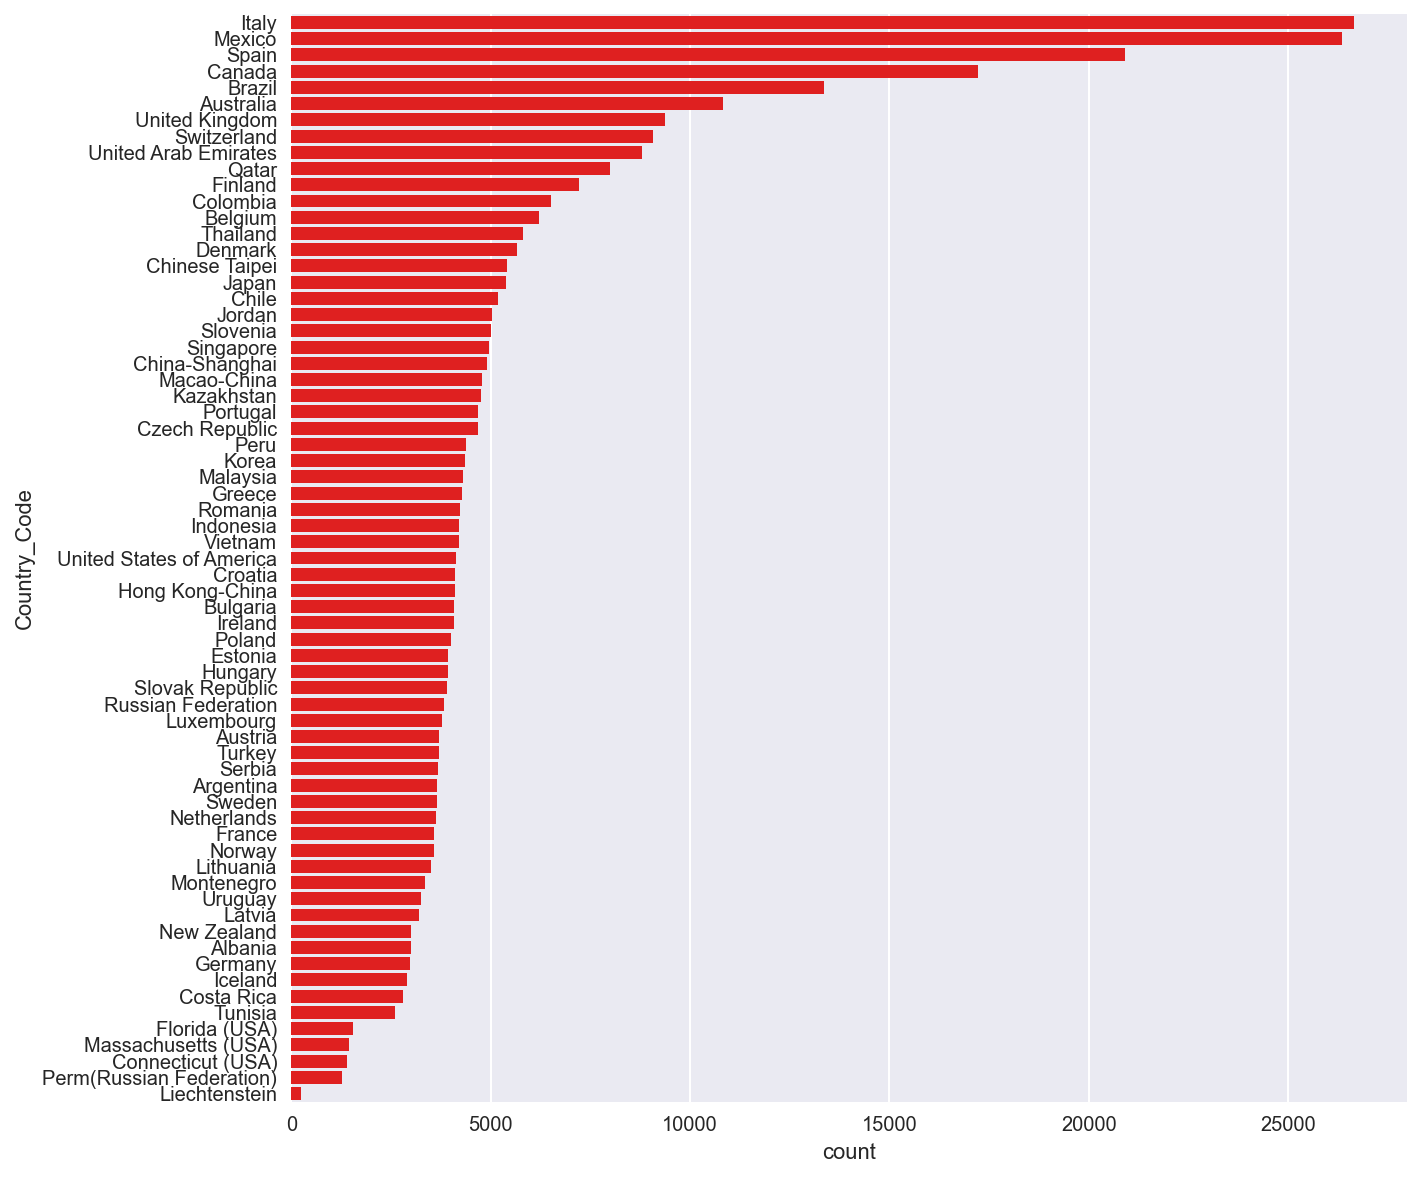

In [96]:
# plot a barchart, counting the number of time every country name appears in a students info
plt.style.use("seaborn");
plt.figure(figsize=(10,10));
sns.countplot(y=pisa["Country_Code"], order = order.index, color="red");
plt.savefig("Countries.png")

**`Key findings`**  
Italy and Mexico are the countries where most of the students have participated. Overall participation seems not to be related to number of inhabitants in the repsective country, as Germany for instance with its 80 million of inhabitants is on the lower level of the chart. It also appears, that the USA are split into three regions (Florida, Massachusetts and Connecticut), which does not appear to be really intuitive. 

---
<a id='corr'></a>
2. Data variable correlations  
Analyse any correlation between the data. Some columns that we before converted to categoric as they contained values like `one`, `two`, `three` can be converted to numeric. 
This will increase the range of variables that we can analyse.

In [97]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376339 entries, 0 to 485488
Data columns (total 61 columns):
Country_Code                  376339 non-null object
Student_ID                    376339 non-null int64
International_Grade           376339 non-null int64
Birth_Month                   376339 non-null int64
Birth_Year                    376339 non-null int64
Sex                           376339 non-null category
Late_For_School               376339 non-null category
Skip_Whole_School_Day         376339 non-null category
Skip_Classes_Within_School    376339 non-null float64
Mother_Highest_Schooling      376339 non-null category
Mother_Job_Status             376339 non-null category
Father_Highest_Schooling      376339 non-null category
Father_Job_Status             376339 non-null category
Poss_Desk                     376339 non-null category
Poss_Own_Room                 376339 non-null category
Poss_Study_Place              376339 non-null category
Poss_Computer           

In [98]:
# create a copy first, in case we mess it up
pisa_corr = pisa.copy()

In [99]:
# encode the gender: 1 and 0 for female or male
pisa_corr.Sex.replace({"Female":1, "Male":0}, inplace=True)

In [100]:
# also do a 1 & 0 encoding for wheter a student owns an item or not
for pos in possessions:
    pisa_corr[pos].replace({"Yes":1, "No":0}, inplace=True)

In [101]:
for count in counts:
    print(pisa_corr[count].unique())

[Two, Three or more, One, None]
Categories (4, object): [None < One < Two < Three or more]
[One, Three or more, Two, None]
Categories (4, object): [None < One < Two < Three or more]
[None, Three or more, Two, One]
Categories (4, object): [None < One < Two < Three or more]
[None, Two, One, Three or more]
Categories (4, object): [None < One < Two < Three or more]
[None, Two, One, Three or more]
Categories (4, object): [None < One < Two < Three or more]
[0-10 books, 201-500 books, More than 500 books, 11-25 books, 101-200 books, 26-100 books]
Categories (6, object): [0-10 books < 11-25 books < 26-100 books < 101-200 books < 201-500 books < More than 500 books]


In [102]:
# CAVE: we here replace "Three or more" with 3. This is only partially correct, as three or more is mathematically >=3 instead of 3.
# However we couldnt represent this mathematically and the results we get from this table is quite interesting for the rest of our notebook exploration.
for count in counts[:-1]:
    pisa[count].replace({"None":0, "One":1, "Two":2, "Three or more": 3}, inplace=True)

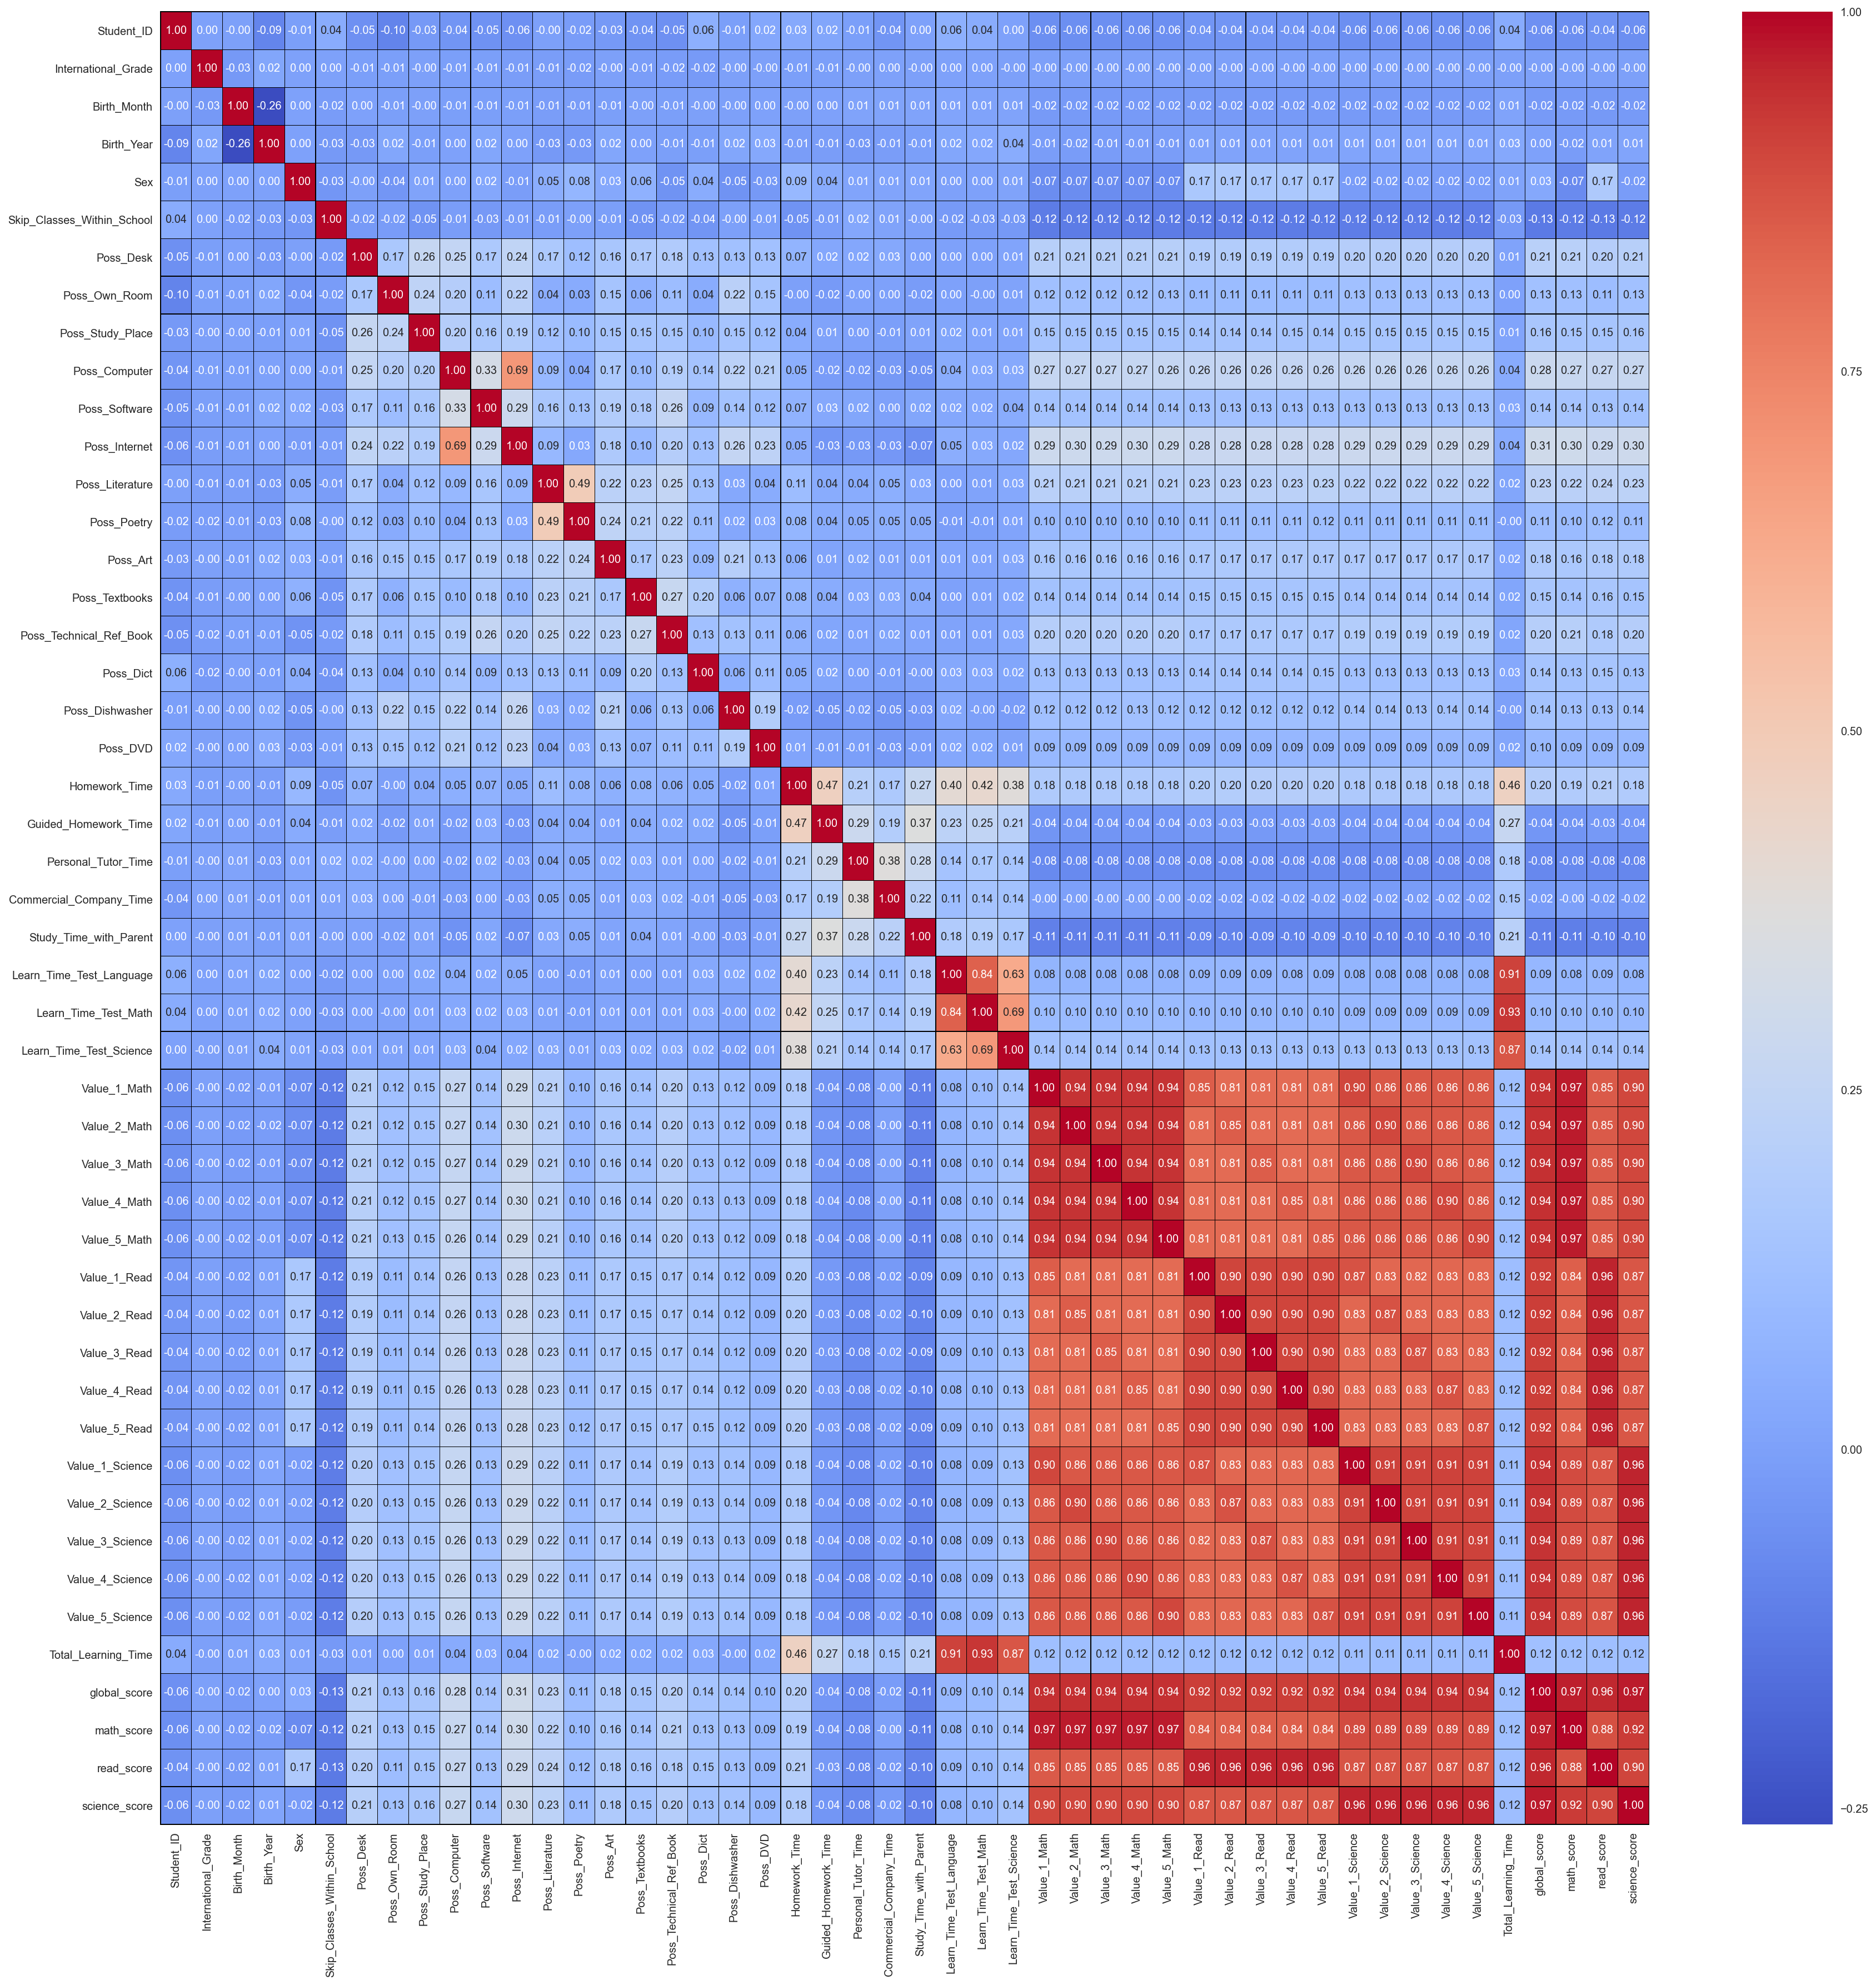

In [103]:
# create a heatmap showing the correlation of all items between each other. Beware, this does not imply any direction or causality.

plt.figure(figsize=(30,30))
fig = sns.heatmap(pisa_corr.corr(),
           cmap="coolwarm", annot=True, fmt=".2f",
           linewidths=0.05, linecolor="black");
fig.patch.set_edgecolor("black");
fig.patch.set_linewidth("1")  
plt.savefig("Correlation_plot.png")

**`Key findings`**  
As expected, score results are highly correlated between each other. Students achieving high test results in science, also trend to reach good grades in math etc. Also some other obvios trends can be obtained from this plot, for instance students possing a computer are highly likely to also have internet. Though this doesnt appear too relevant for our project here, it can help gaining confidence that our multiple data wrangling steps did not introduce any errors into our dataset.

---
<a id='univar_EDA'></a>
3. Univariate Data Exploration
Explore the distribution of `math`, `science` and `reading` results.

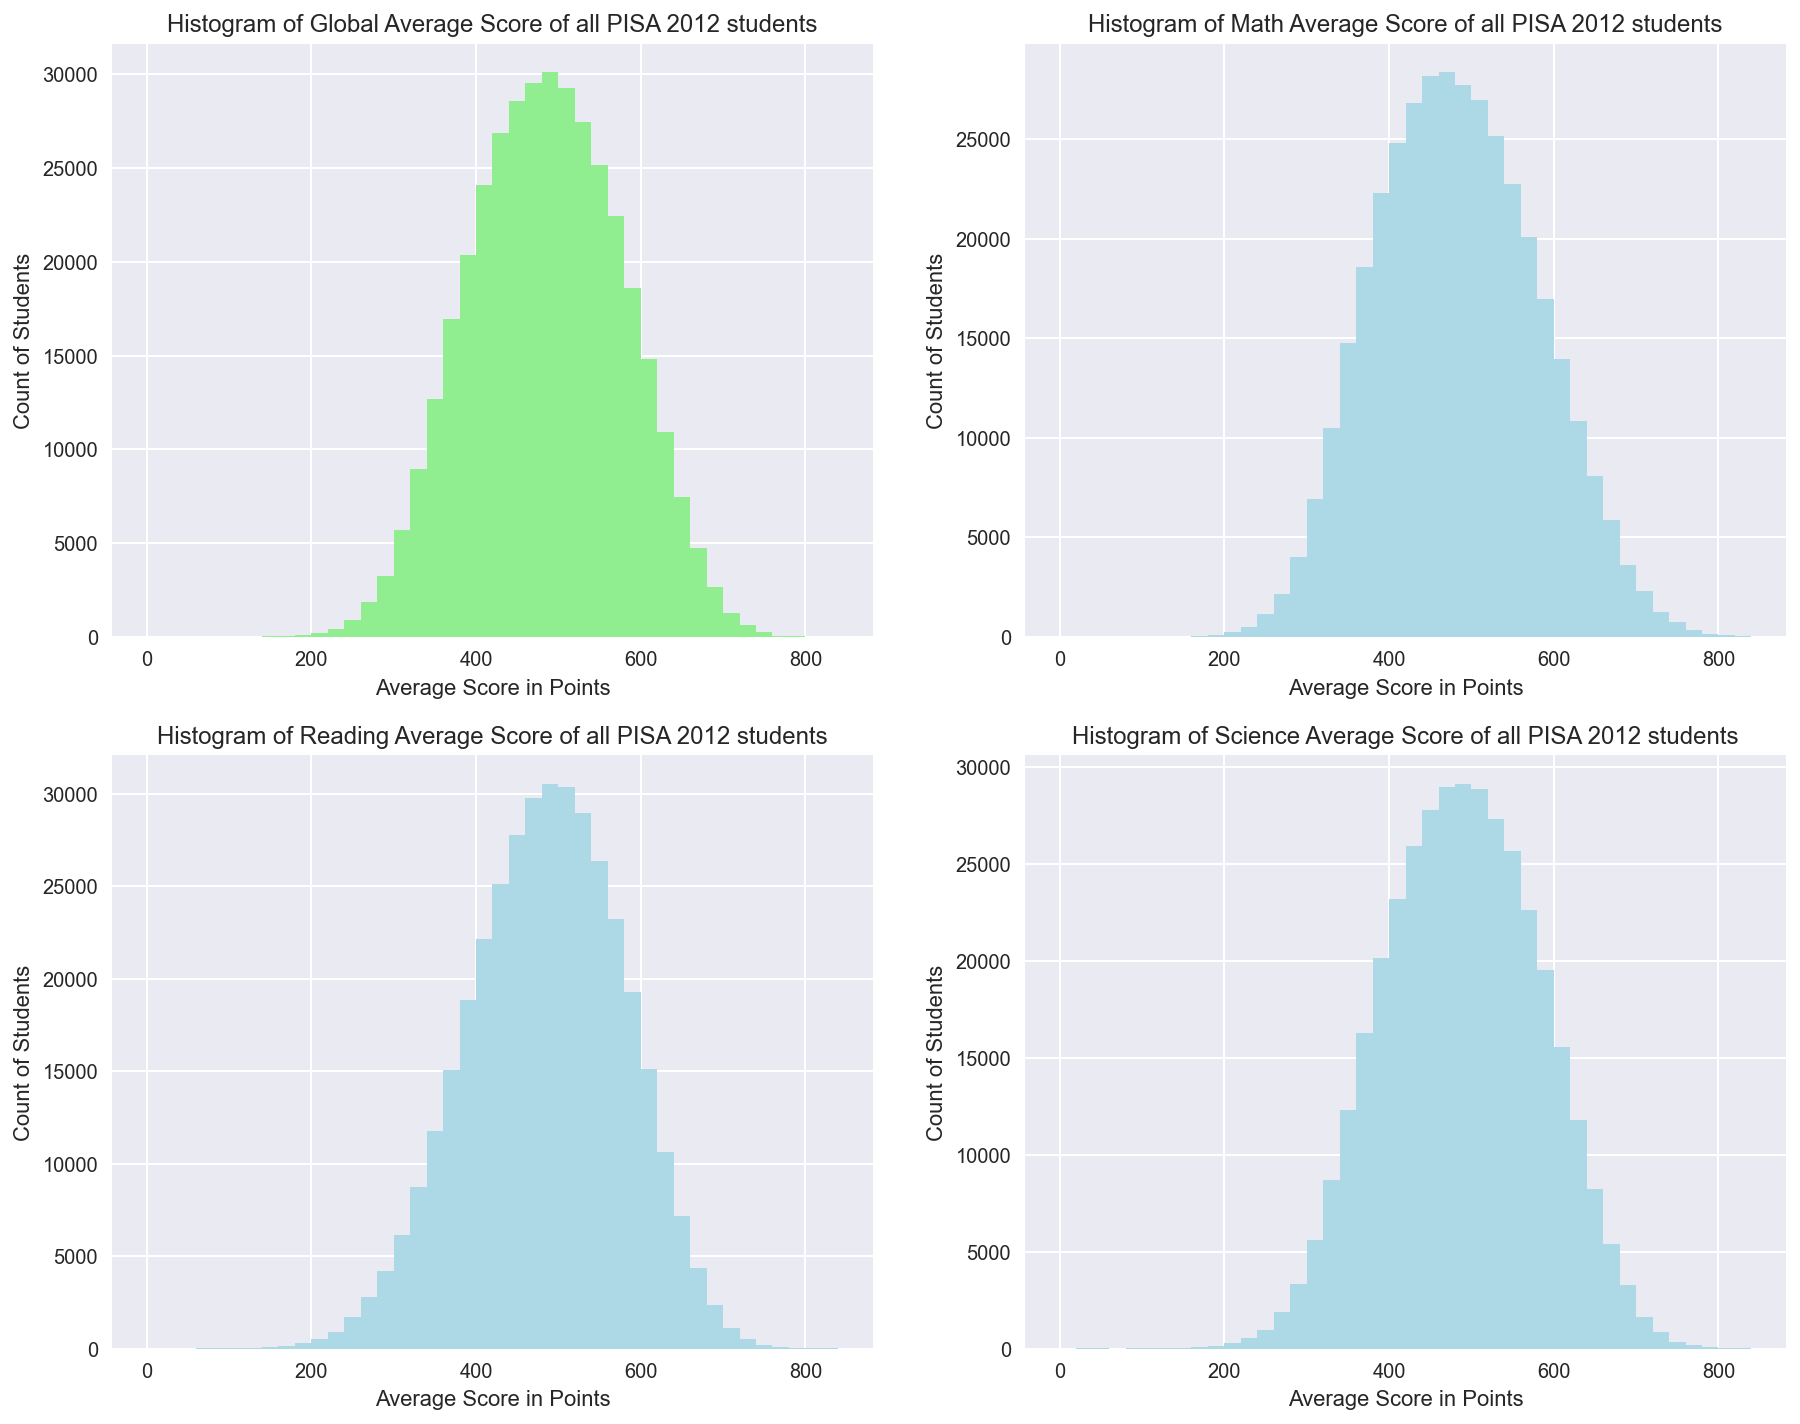

In [104]:
# explore the distribution of test scores
# create individual bins for each variable

plt.style.use("seaborn")

##### reset to default plt style #####
#plt.rcParams.update(plt.rcParamsDefault)
#%matplotlib inline
#%config InlineBackend.figure_format = "retina"
######################################

plt.figure(figsize=(15,12));
plt.subplot(2,2,1);
bins = np.arange(0, pisa.global_score.max()+20,20);
plt.hist(data=pisa, x="global_score", bins=bins, color="lightgreen");
plt.title("Histogram of Global Average Score of all PISA 2012 students");
plt.xlabel("Average Score in Points");
plt.ylabel("Count of Students");

plt.subplot(2,2,2);
bins = np.arange(0, pisa.global_score.max()+20,20);
plt.hist(data=pisa, x="math_score", bins=bins, color="lightblue");
plt.title("Histogram of Math Average Score of all PISA 2012 students");
plt.xlabel("Average Score in Points");
plt.ylabel("Count of Students");

plt.subplot(2,2,3);
bins = np.arange(0, pisa.global_score.max()+20,20);
plt.hist(data=pisa, x="read_score", bins=bins, color="lightblue");
plt.title("Histogram of Reading Average Score of all PISA 2012 students");
plt.xlabel("Average Score in Points");
plt.ylabel("Count of Students");

plt.subplot(2,2,4);
bins = np.arange(0, pisa.global_score.max()+20,20);
plt.hist(data=pisa, x="science_score", bins=bins, color="lightblue");
plt.title("Histogram of Science Average Score of all PISA 2012 students");
plt.xlabel("Average Score in Points");
plt.ylabel("Count of Students");

plt.savefig("Histogram_Scores.png")

**`Key findings`**  
All test results appear to be normally distributed, with a center around values of 500 points. No skewness is observed. This would fit the central limit theorem (CLT), that the distribution of datasets with large sample sizes trend towards a almost normal distribution.

---
<a id='study_times'></a>
4. Univariate Data Exploration
Explore the distribution of study times.

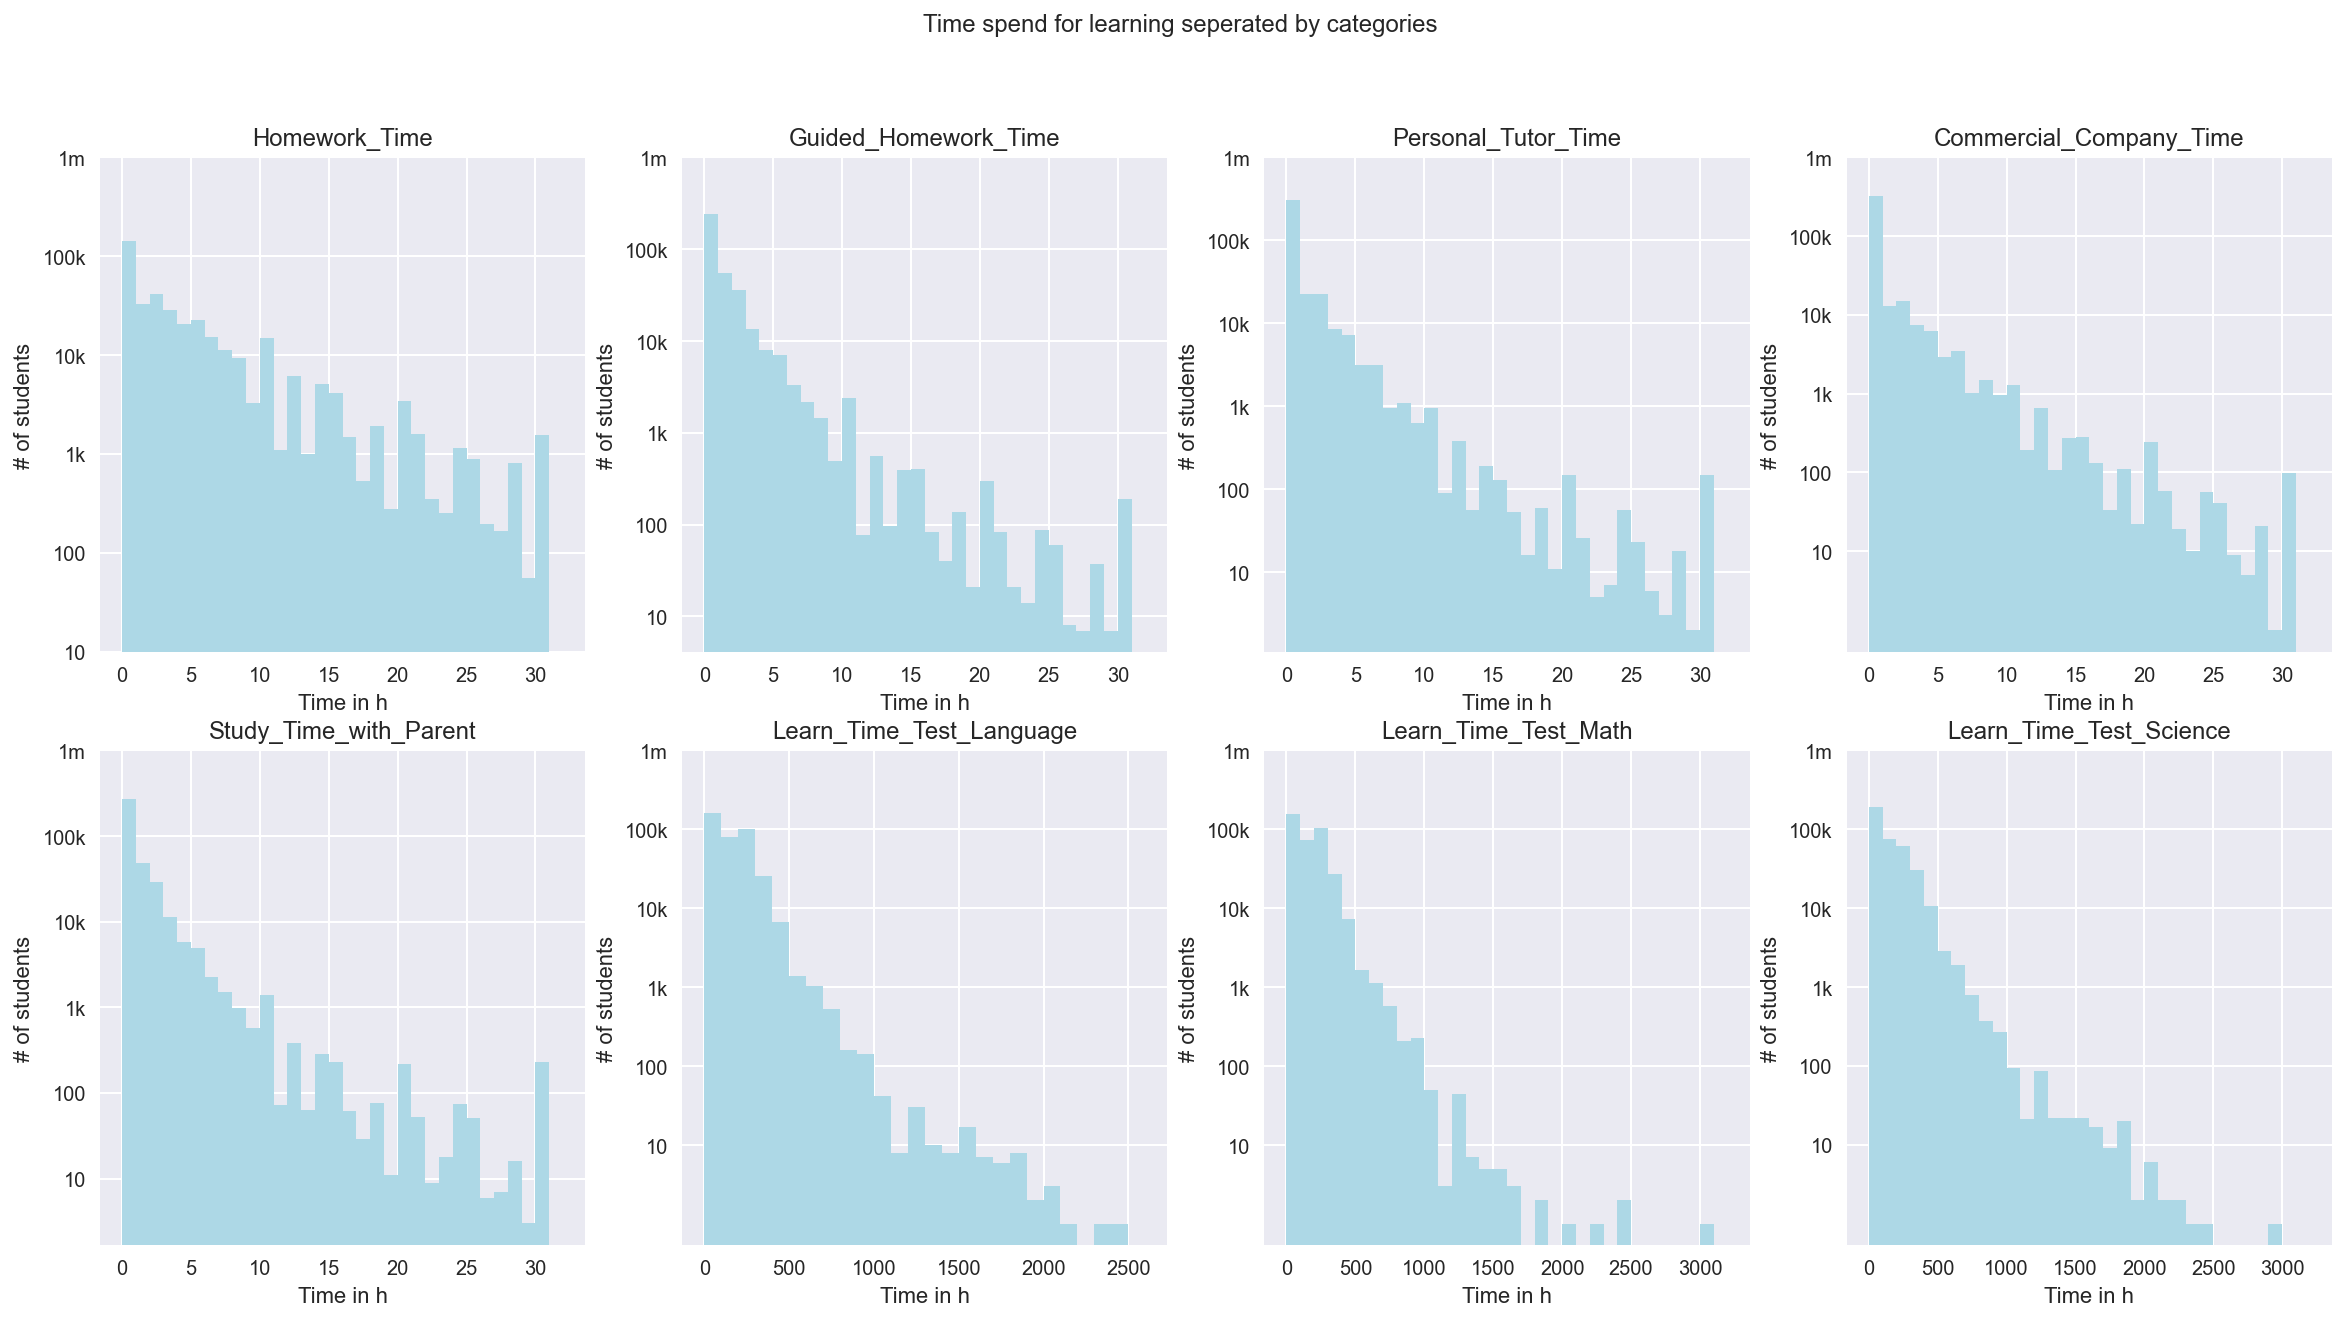

In [105]:
# use a log scale on the y - axis: During exploration I discovered many many students are actually in the smallest bin size. Using a linear scale
# decreased the ability of this plot to extract info on those students that are on the upper side of the curve (spending a lot time)

axes = []
fig = plt.figure(figsize=(20,10));
n_rows = 2
n_cols = 4

for idx, col in enumerate(learning_time):
    axes.append(fig.add_subplot(n_rows, n_cols, idx+1));
    data = pisa[col]
    bins = np.arange(0, data.max() + (data.max()/10), 1)
    if col.startswith("Learn"):
        bins = np.arange(0, data.max() + (data.max()/10), 100)
    plt.hist(data, color="lightblue", bins=bins)
    plt.title(col)
    plt.yscale("log")
    plt.xlabel("Time in h")
    plt.ylabel("# of students")
    plt.yticks([10,100,1000,10000,100000,1e6], ["10","100","1k","10k","100k","1m"])
plt.suptitle("Time spend for learning seperated by categories")
plt.savefig("Study_Time_Histograms.png")

**`Key findings`**  
As expected, learning times / study times for all categories show a negative correlation to the number of students that fall into each category (wacth out for the logarithmic scale on the y-axis).

---
<a id='total_learning'></a>
5. **Total Learning Time:** Are girls spending more time learning for school than boys?  
Create a histogram of the `Total Learning Time`, separated for boys and girls

In [63]:
gender_diffs = pisa.groupby("Sex")["Total_Learning_Time"]
gender_diffs.agg(["mean", "median", "std"])

mean  median         std
Sex                                   
Female  401.027863   456.0  370.941748
Male    396.970614   452.0  375.734790

In [106]:
# the mean is slightly higher for girls, than for boys, however the std is quite large, so this is likely not signficant (no statistical t-test performed however)

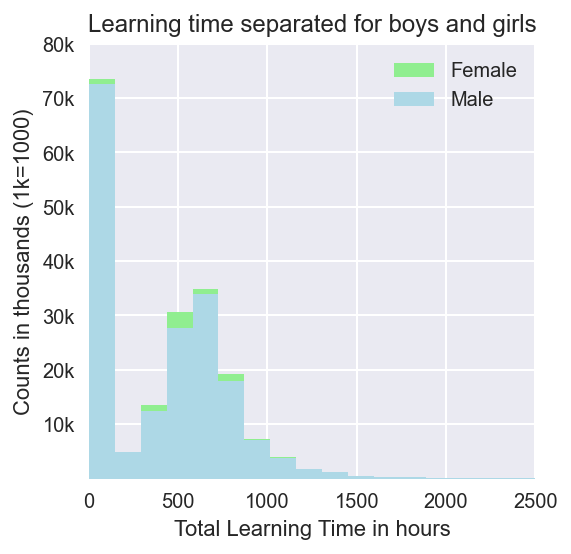

In [107]:
# visualise the distribution of learning times for girls (green) and boys (blue) in a histogram

bins = np.linspace(0, np.max(pisa.Total_Learning_Time)+10,30)

plt.figure(figsize=[4,4])
fig = plt.hist(x = pisa.query("Sex == 'Female'")["Total_Learning_Time"], bins = bins, color="lightgreen", alpha=1, label="Female")
fig = plt.hist(x = pisa.query("Sex == 'Male'")["Total_Learning_Time"], bins = bins, color="lightblue", alpha=1, label="Male")
plt.xlim(0, 2500);
plt.yticks([1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4], ["10k","20k","30k","40k","50k","60k","70k", "80k"]);
plt.ylabel("Counts in thousands (1k=1000)");
plt.xlabel("Total Learning Time in hours");
plt.legend(loc="upper right");
plt.title("Learning time separated for boys and girls");
plt.savefig("Learning_Time_Boys_Girls.png")

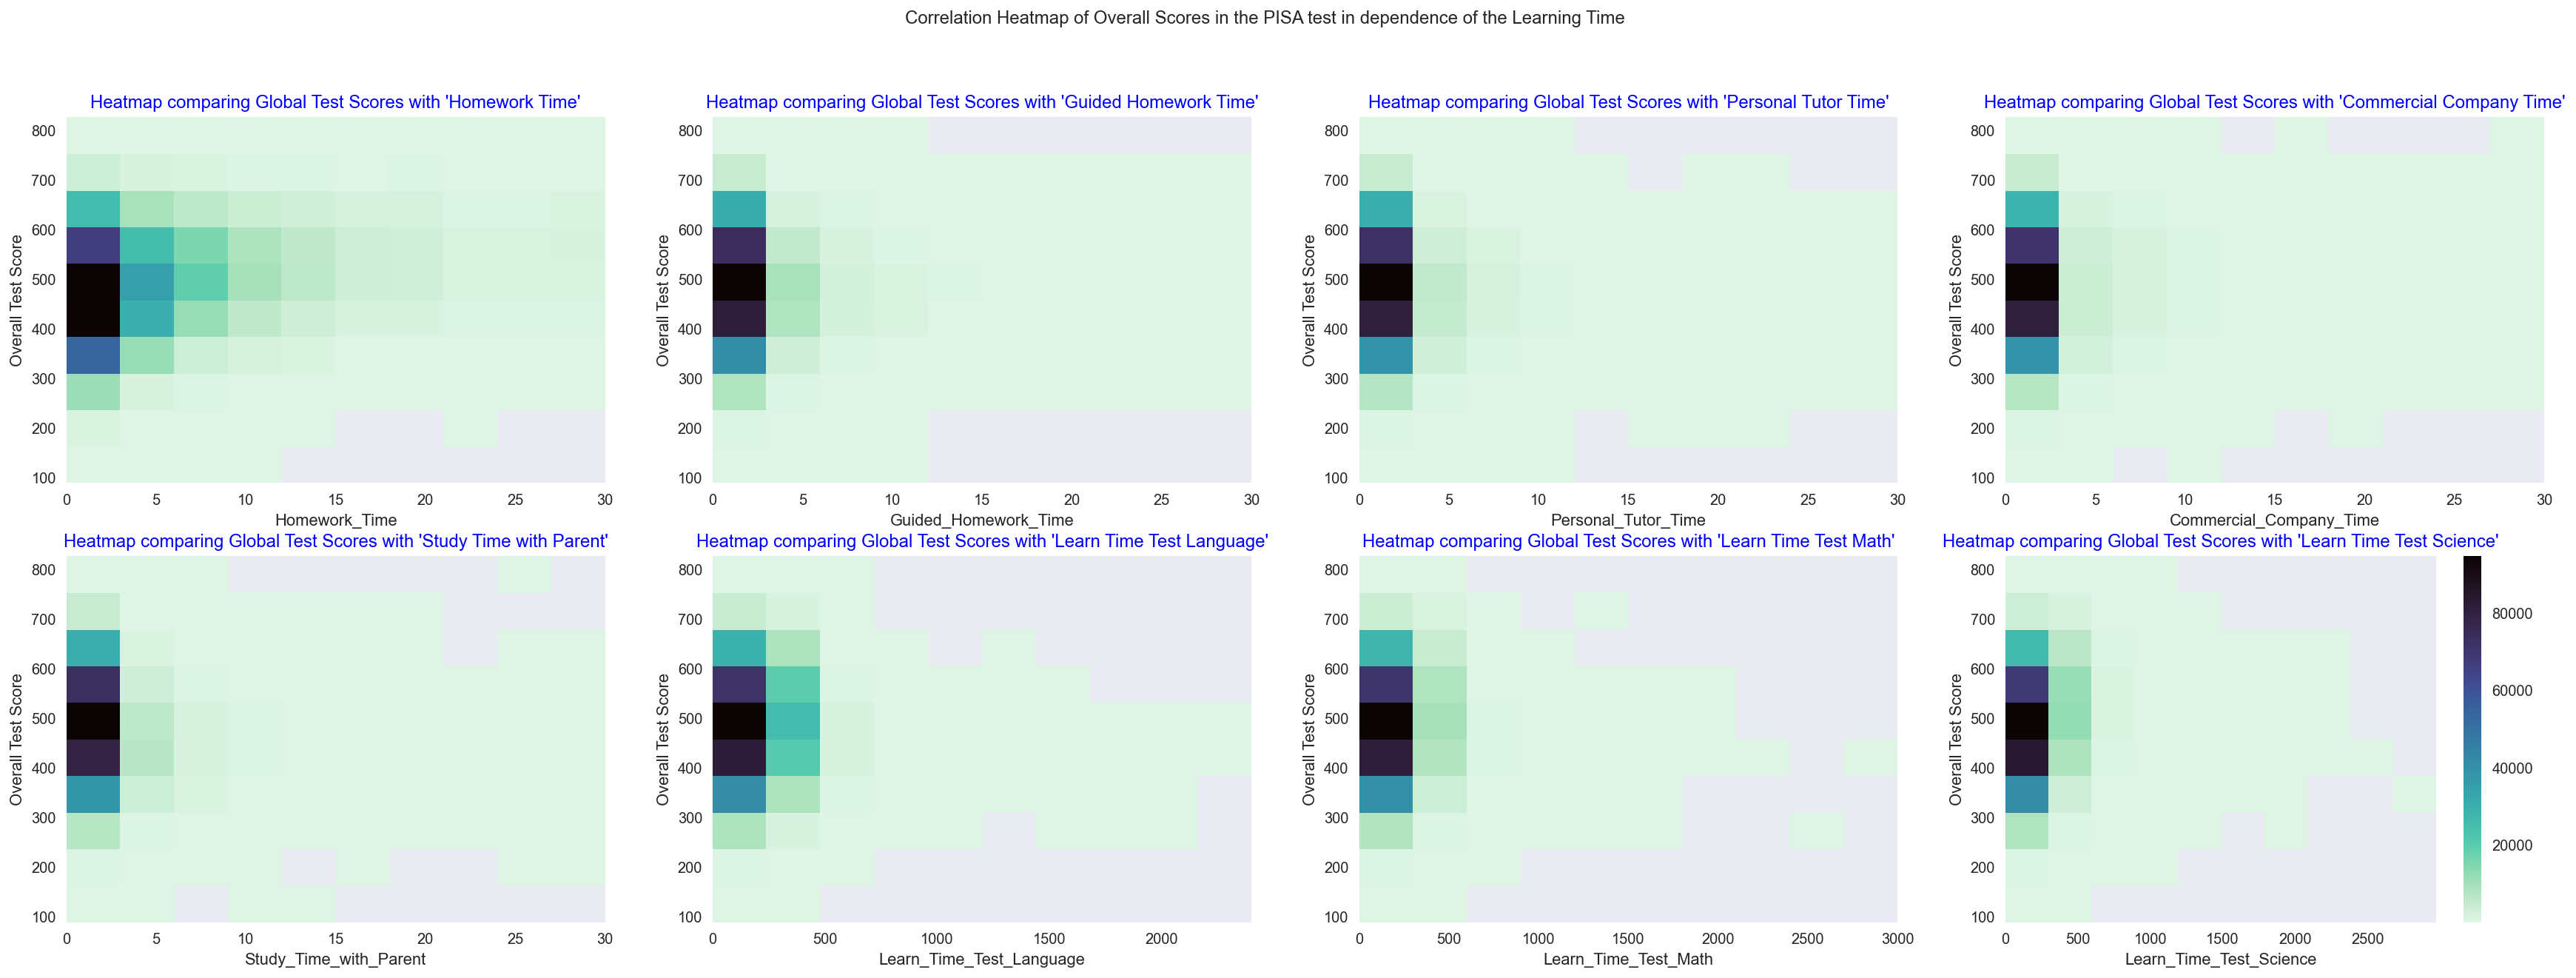

In [110]:
# other students have mostly focused their notebook in the correlations that follow:
# correlation the global test scores with the amount of time and effort student spend learning in school
# this is an obvious question, so lets quickly see if theres any info that could be interesting
# in 2d-histograms we can bin the datapoints on the x-y axis together and color each bin according to the number of items in a bin
# however I do not see a clear correlation in any of these, thus learning time does not seem to have a profound effect on the test score (or vice versa (no direction in correlation allowed))
# this is largely supported by the findings of other students during this project

axes = []
nrows = 2
ncols = 4

fig = plt.figure(figsize=(30,10))

for idx, col in enumerate(learning_time):
    axes.append(fig.add_subplot(nrows, ncols, idx+1))
    plt.title("Heatmap comparing Global Test Scores with '{}'".format(col.replace("_", " ")), color="blue")
    plt.hist2d(data=pisa, x=col, y="global_score", cmap="mako_r", cmin=0.8)
    plt.xlabel(col)
    plt.ylabel("Overall Test Score")
    
plt.suptitle("Correlation Heatmap of Overall Scores in the PISA test in dependence of the Learning Time")    
plt.colorbar();
plt.savefig("Heatmap_Learning_Times.png")

**`Key findings`**  
Female participants trend to have a slightly higher motivation to spend time learning for school than boys have. To validate this for statistical significance we could either use t-test or bootstrapping.

---
<a id='possessions'></a>
6. **Possessions** What is the distribution of possessing items like Computer, a dishwasher and a own room?  
Create a clustered bar chart of the `possession` items.

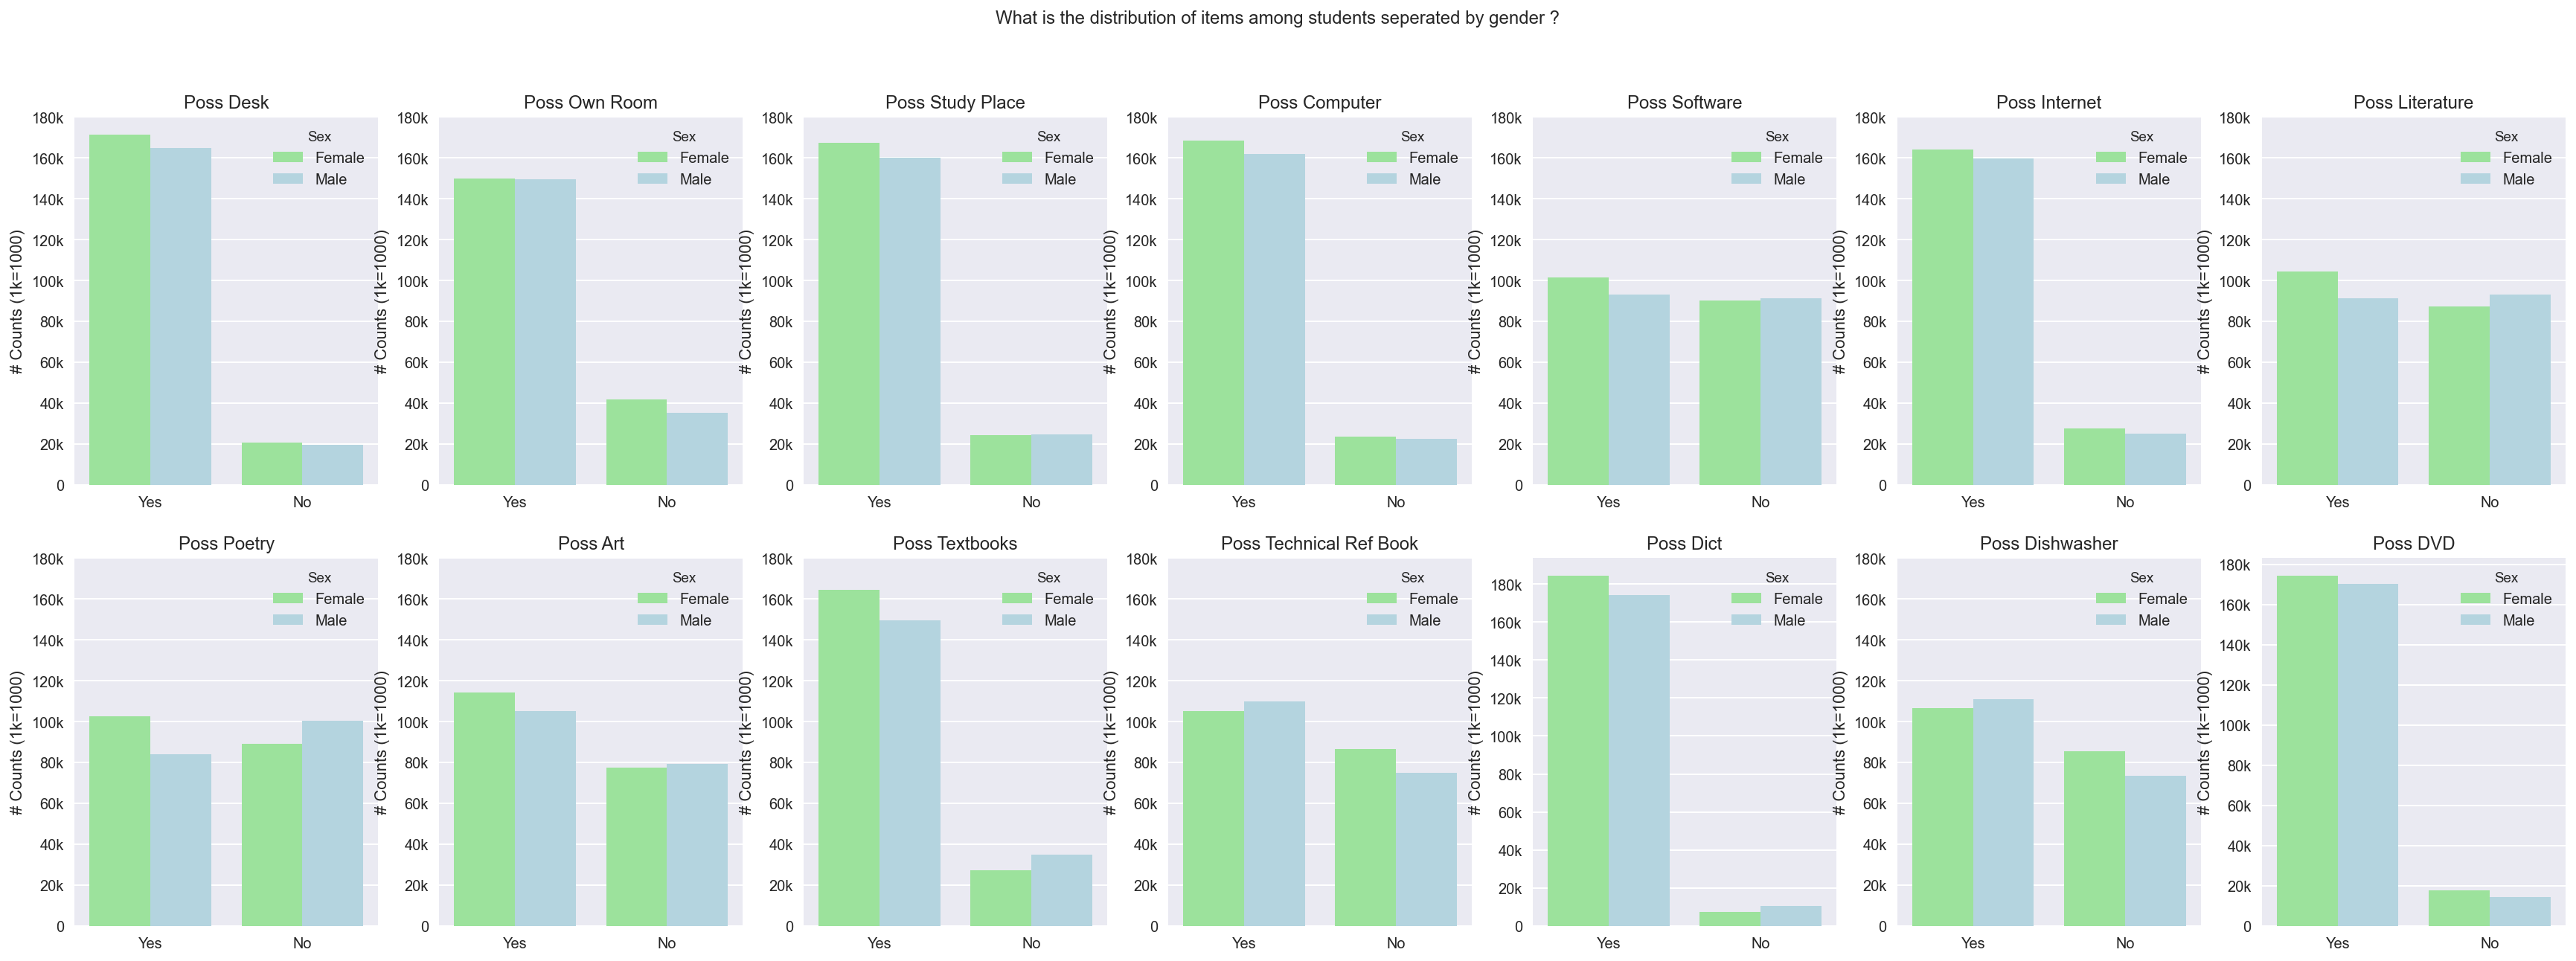

In [114]:
# count the number of times an individual possesses an item for all items in our possessions list and plot it as bar charts, seperated by gender
# we next want to investigate if this is having an effect on the PISA scores, so get a first estimation how these items are distributed

fig = plt.figure(figsize=(30,10))

axes = []
nrows = 2
ncols = 7

for idx, col in enumerate(possessions):
    axes.append(fig.add_subplot(nrows, ncols, idx+1))
    sns.countplot(data=pisa, x=col, hue="Sex", palette=["lightgreen", "lightblue"], order=["Yes","No"])
    plt.yticks([x for x in np.arange(0, 200000, 20000)], ["{}k".format(str(x)[:-3]) if x!=0 else str(x) for x in np.arange(0, 200000, 20000)]);
    plt.title(col.replace("_", " "))
    plt.xlabel(None)
    plt.ylabel("# Counts (1k=1000)")
plt.suptitle("What is the distribution of items among students seperated by gender ? ")
plt.savefig("Possessions.png")

In [112]:
pisa.groupby("Sex")[possessions].agg("count")

Poss_Desk  Poss_Own_Room  Poss_Study_Place  Poss_Computer  \
Sex                                                                 
Female     191830         191830            191830         191830   
Male       184509         184509            184509         184509   

        Poss_Software  Poss_Internet  Poss_Literature  Poss_Poetry  Poss_Art  \
Sex                                                                            
Female         191830         191830           191830       191830    191830   
Male           184509         184509           184509       184509    184509   

        Poss_Textbooks  Poss_Technical_Ref_Book  Poss_Dict  Poss_Dishwasher  \
Sex                                                                           
Female          191830                   191830     191830           191830   
Male            184509                   184509     184509           184509   

        Poss_DVD  
Sex               
Female    191830  
Male      184509

**`Key findings`**  
I here used barplots to count the number of students possessing different items, separated by gender. Girls tend to have more poetry, art and text books than boys, while the latter tend to have more technical reference books. 

---
<a id='counts'></a>
7. **Counts** What is the distribution count of numbers of items like Computer, Cars and bath rooms?  
Create a clustered bar chart of the `counts` items.

In [113]:
counted = pisa.groupby("Sex")[counts]
counted.agg(["mean", "median", "min", "max", "std"])

Count_Cell_Phone                           Count_TV                 \
                   mean median min max       std      mean median min max   
Sex                                                                         
Female         2.791894      3   0   3  0.560956  2.173534      2   0   3   
Male           2.769832      3   0   3  0.599468  2.256611      2   0   3   

                  ... Count_Cars                          Count_Bath_Rooms  \
             std  ...       mean median min max       std             mean   
Sex               ...                                                        
Female  0.805790  ...   1.404535      1   0   3  0.964312         1.461049   
Male    0.794535  ...   1.452406      1   0   3  0.968613         1.488551   

                                 
       median min max       std  
Sex                              
Female      1   0   3  0.846842  
Male        1   0   3  0.835926  

[2 rows x 25 columns]

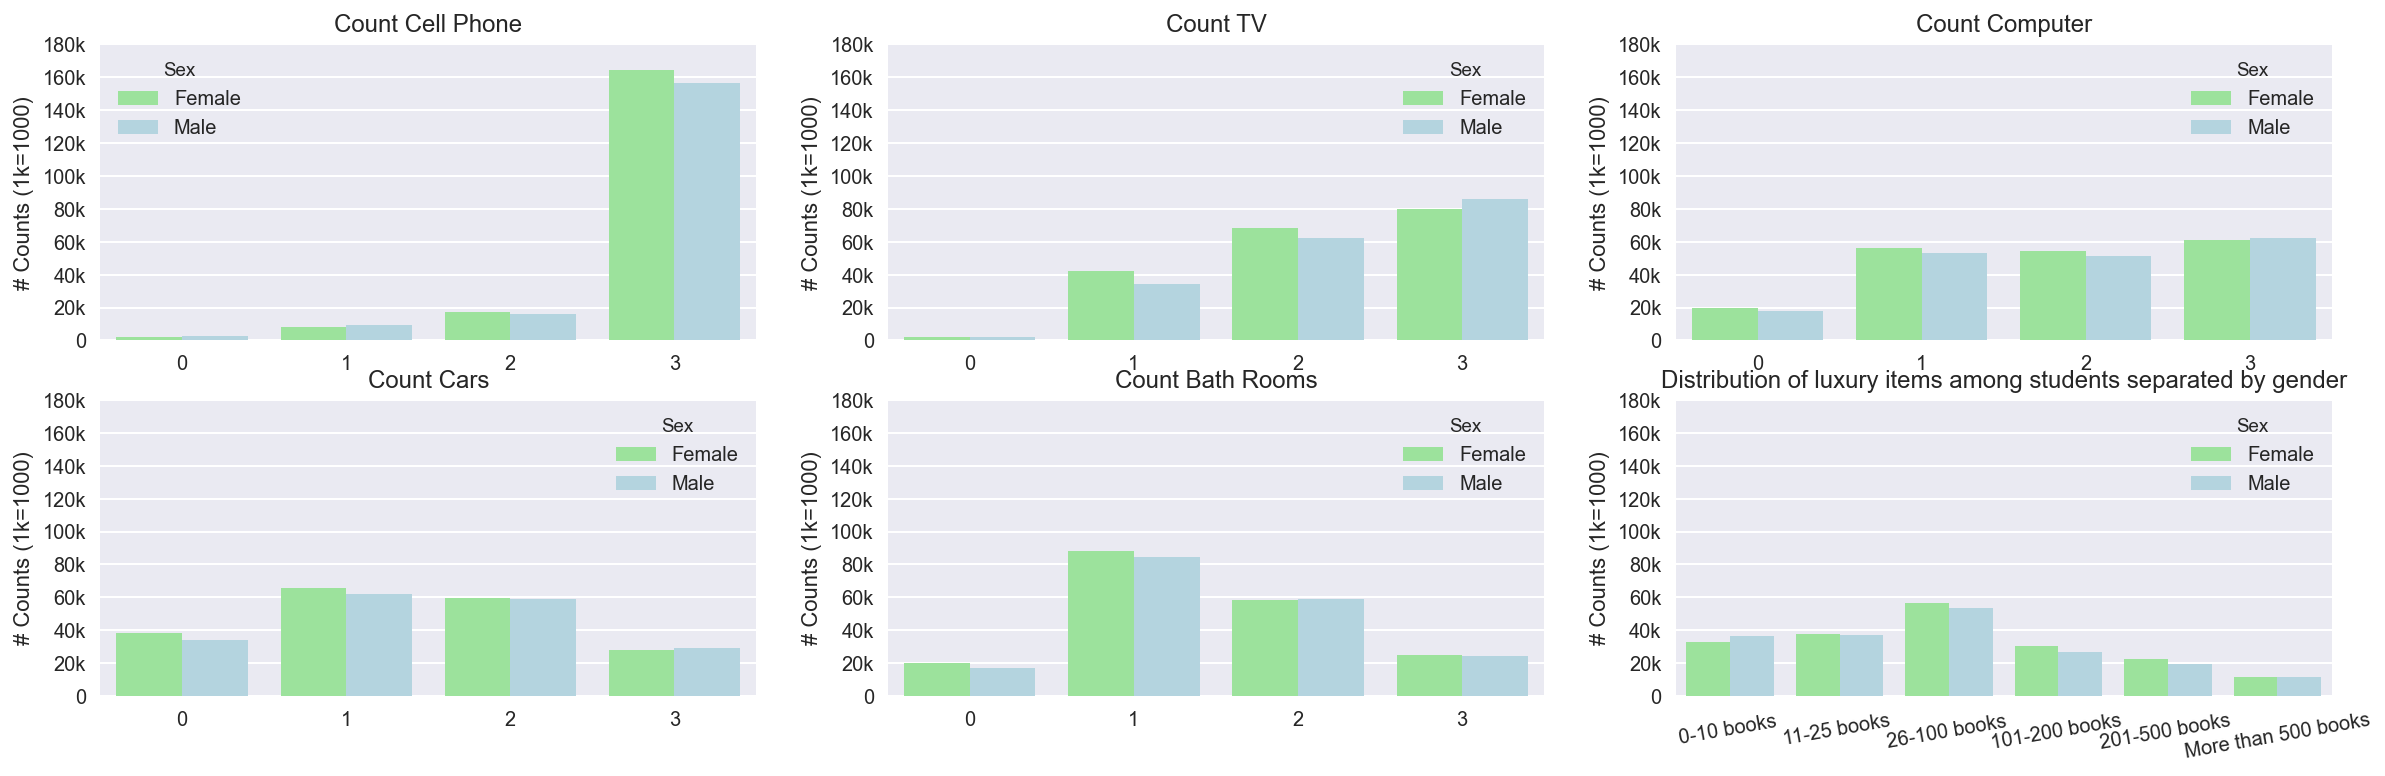

In [115]:
# repeat the same process for our columns in the count list, this time counting the number of items for each individual

fig = plt.figure(figsize=(20,6))

axes = []
nrows = 2
ncols = 3

for idx, col in enumerate(counts):
    axes.append(fig.add_subplot(nrows, ncols, idx+1))
    
    if col != "Count_Books":
        sns.countplot(data=pisa, x=col, hue="Sex", palette=["lightgreen", "lightblue"], order=[0,1,2,3])
    else:
        sns.countplot(data=pisa, x=col, hue="Sex", palette=["lightgreen", "lightblue"])
        plt.xticks(rotation = 10)

    plt.yticks([x for x in np.arange(0, 200000, 20000)], ["{}k".format(str(x)[:-3]) if x!=0 else str(x) for x in np.arange(0, 200000, 20000)]);
    plt.title(col.replace("_", " "))
    plt.ylabel("# Counts (1k=1000)")
    plt.xlabel(None)

plt.title("Distribution of luxury items among students separated by gender")
plt.savefig("Counts.png")

In [116]:
# perform an exploratory statistic on whether the number of bath rooms has an effect on the global score (averaged)
pisa.groupby("Count_Bath_Rooms")["global_score"].mean()

Count_Bath_Rooms
0    428.615180
1    481.835045
2    503.495792
3    495.684616
Name: global_score, dtype: float64

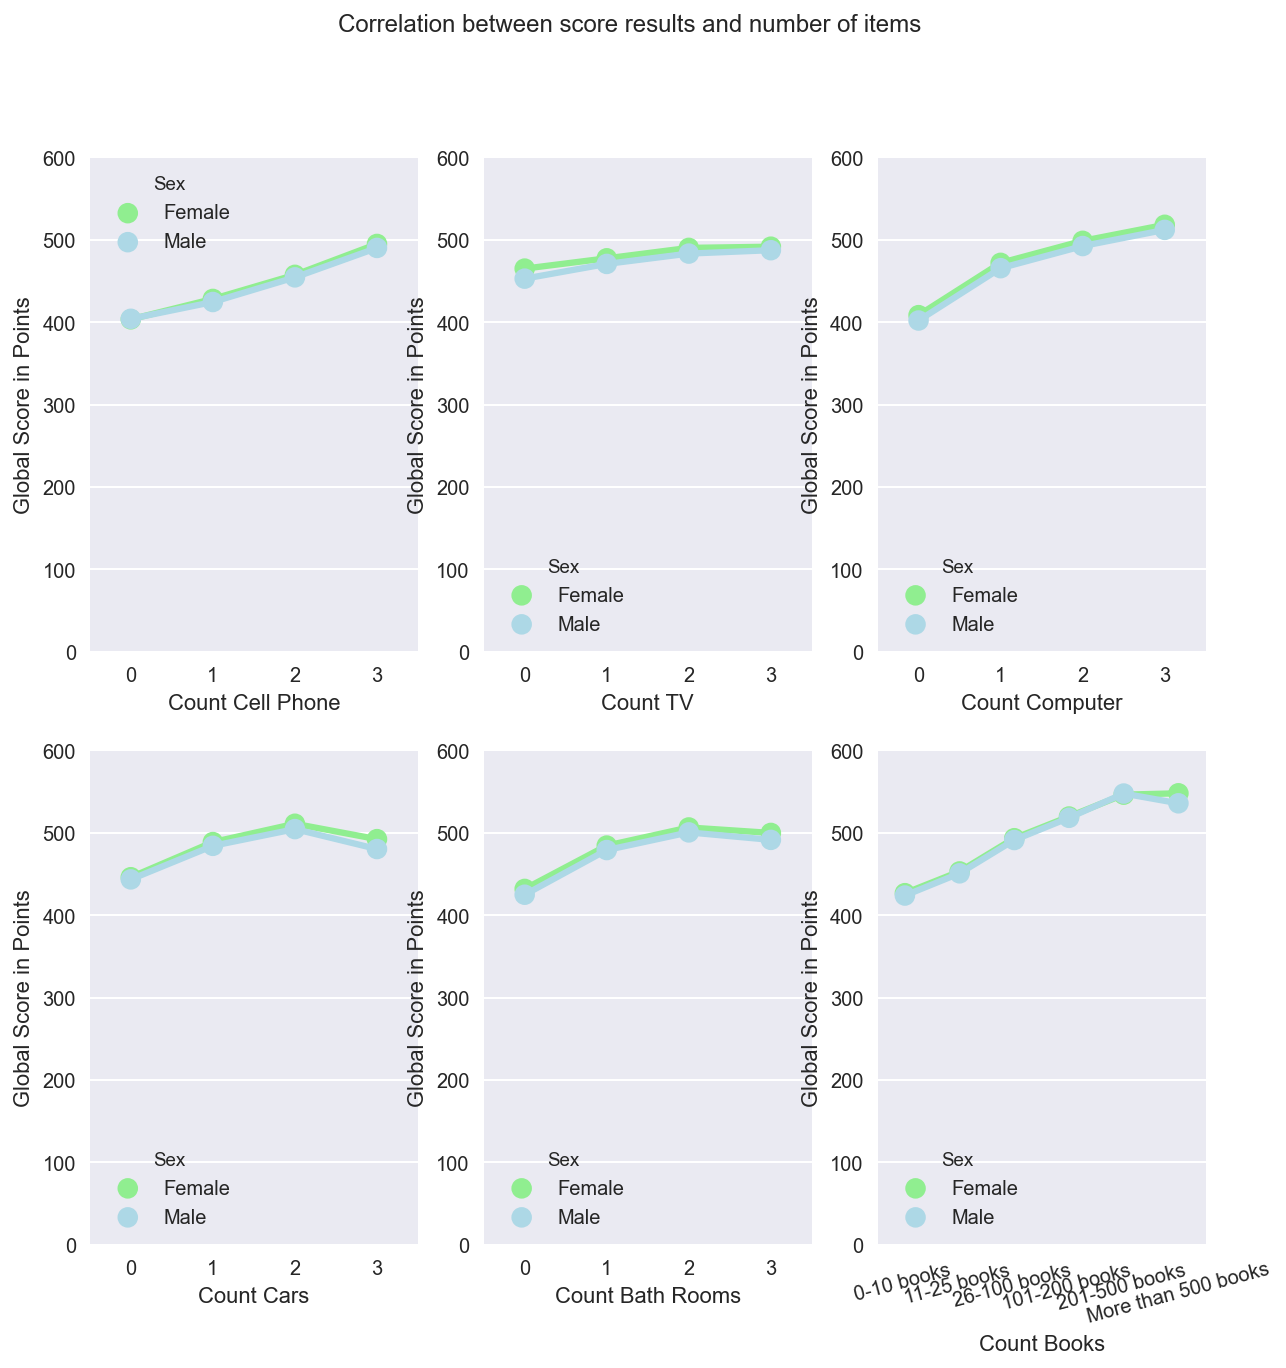

In [153]:
# We next wonder, wether students having more luxury items at home (more cars, more bath rooms (indicating a larger home)) has any correlation 
# to the overall test results
# use a lineplot doing so

fig = plt.figure(figsize=(10,10))

nrows = 2
ncols = 3
axes = []

for idx, col in enumerate(counts):
    axes.append(fig.add_subplot(nrows, ncols, idx+1))
    sns.pointplot(data=pisa, x=col, y="global_score", hue="Sex", palette=["lightgreen", "lightblue"]);
    plt.ylim([0, 600]);
    plt.ylabel("Global Score in Points")
    plt.xlabel(col.replace("_", " "))
    if idx == 5:
        plt.xticks(rotation=15)
plt.suptitle("Correlation between score results and number of items")
plt.savefig("Counts_Scores.png")

**`Key findings`**  
The latter plot is quite interesting. The more bathrooms a student has in his house the better his score results are (while the last shows a slight decrease). This might largely be explained, that number of bathrooms is an indicator of luxury, thus studens like these might have a better access to education, resources like computer and heavily expensive school textbooks. All these trends also occur for number of cars, cell phones at home and computer.

---
<a id='Correlations_Count_Grade'></a>
8. **Correlations:** Is there any correlation between count of "luxury" items and grade?  
Use seaborns `PairGrid` to explore any possible trends.

In [120]:
# create a new list of interest and extend it with the scores
variables = []
variables.extend(counts)
variables.extend(["global_score", "math_score", "science_score", "read_score"])
variables

['Count_Cell_Phone',
 'Count_TV',
 'Count_Computer',
 'Count_Cars',
 'Count_Bath_Rooms',
 'Count_Books',
 'global_score',
 'math_score',
 'science_score',
 'read_score']

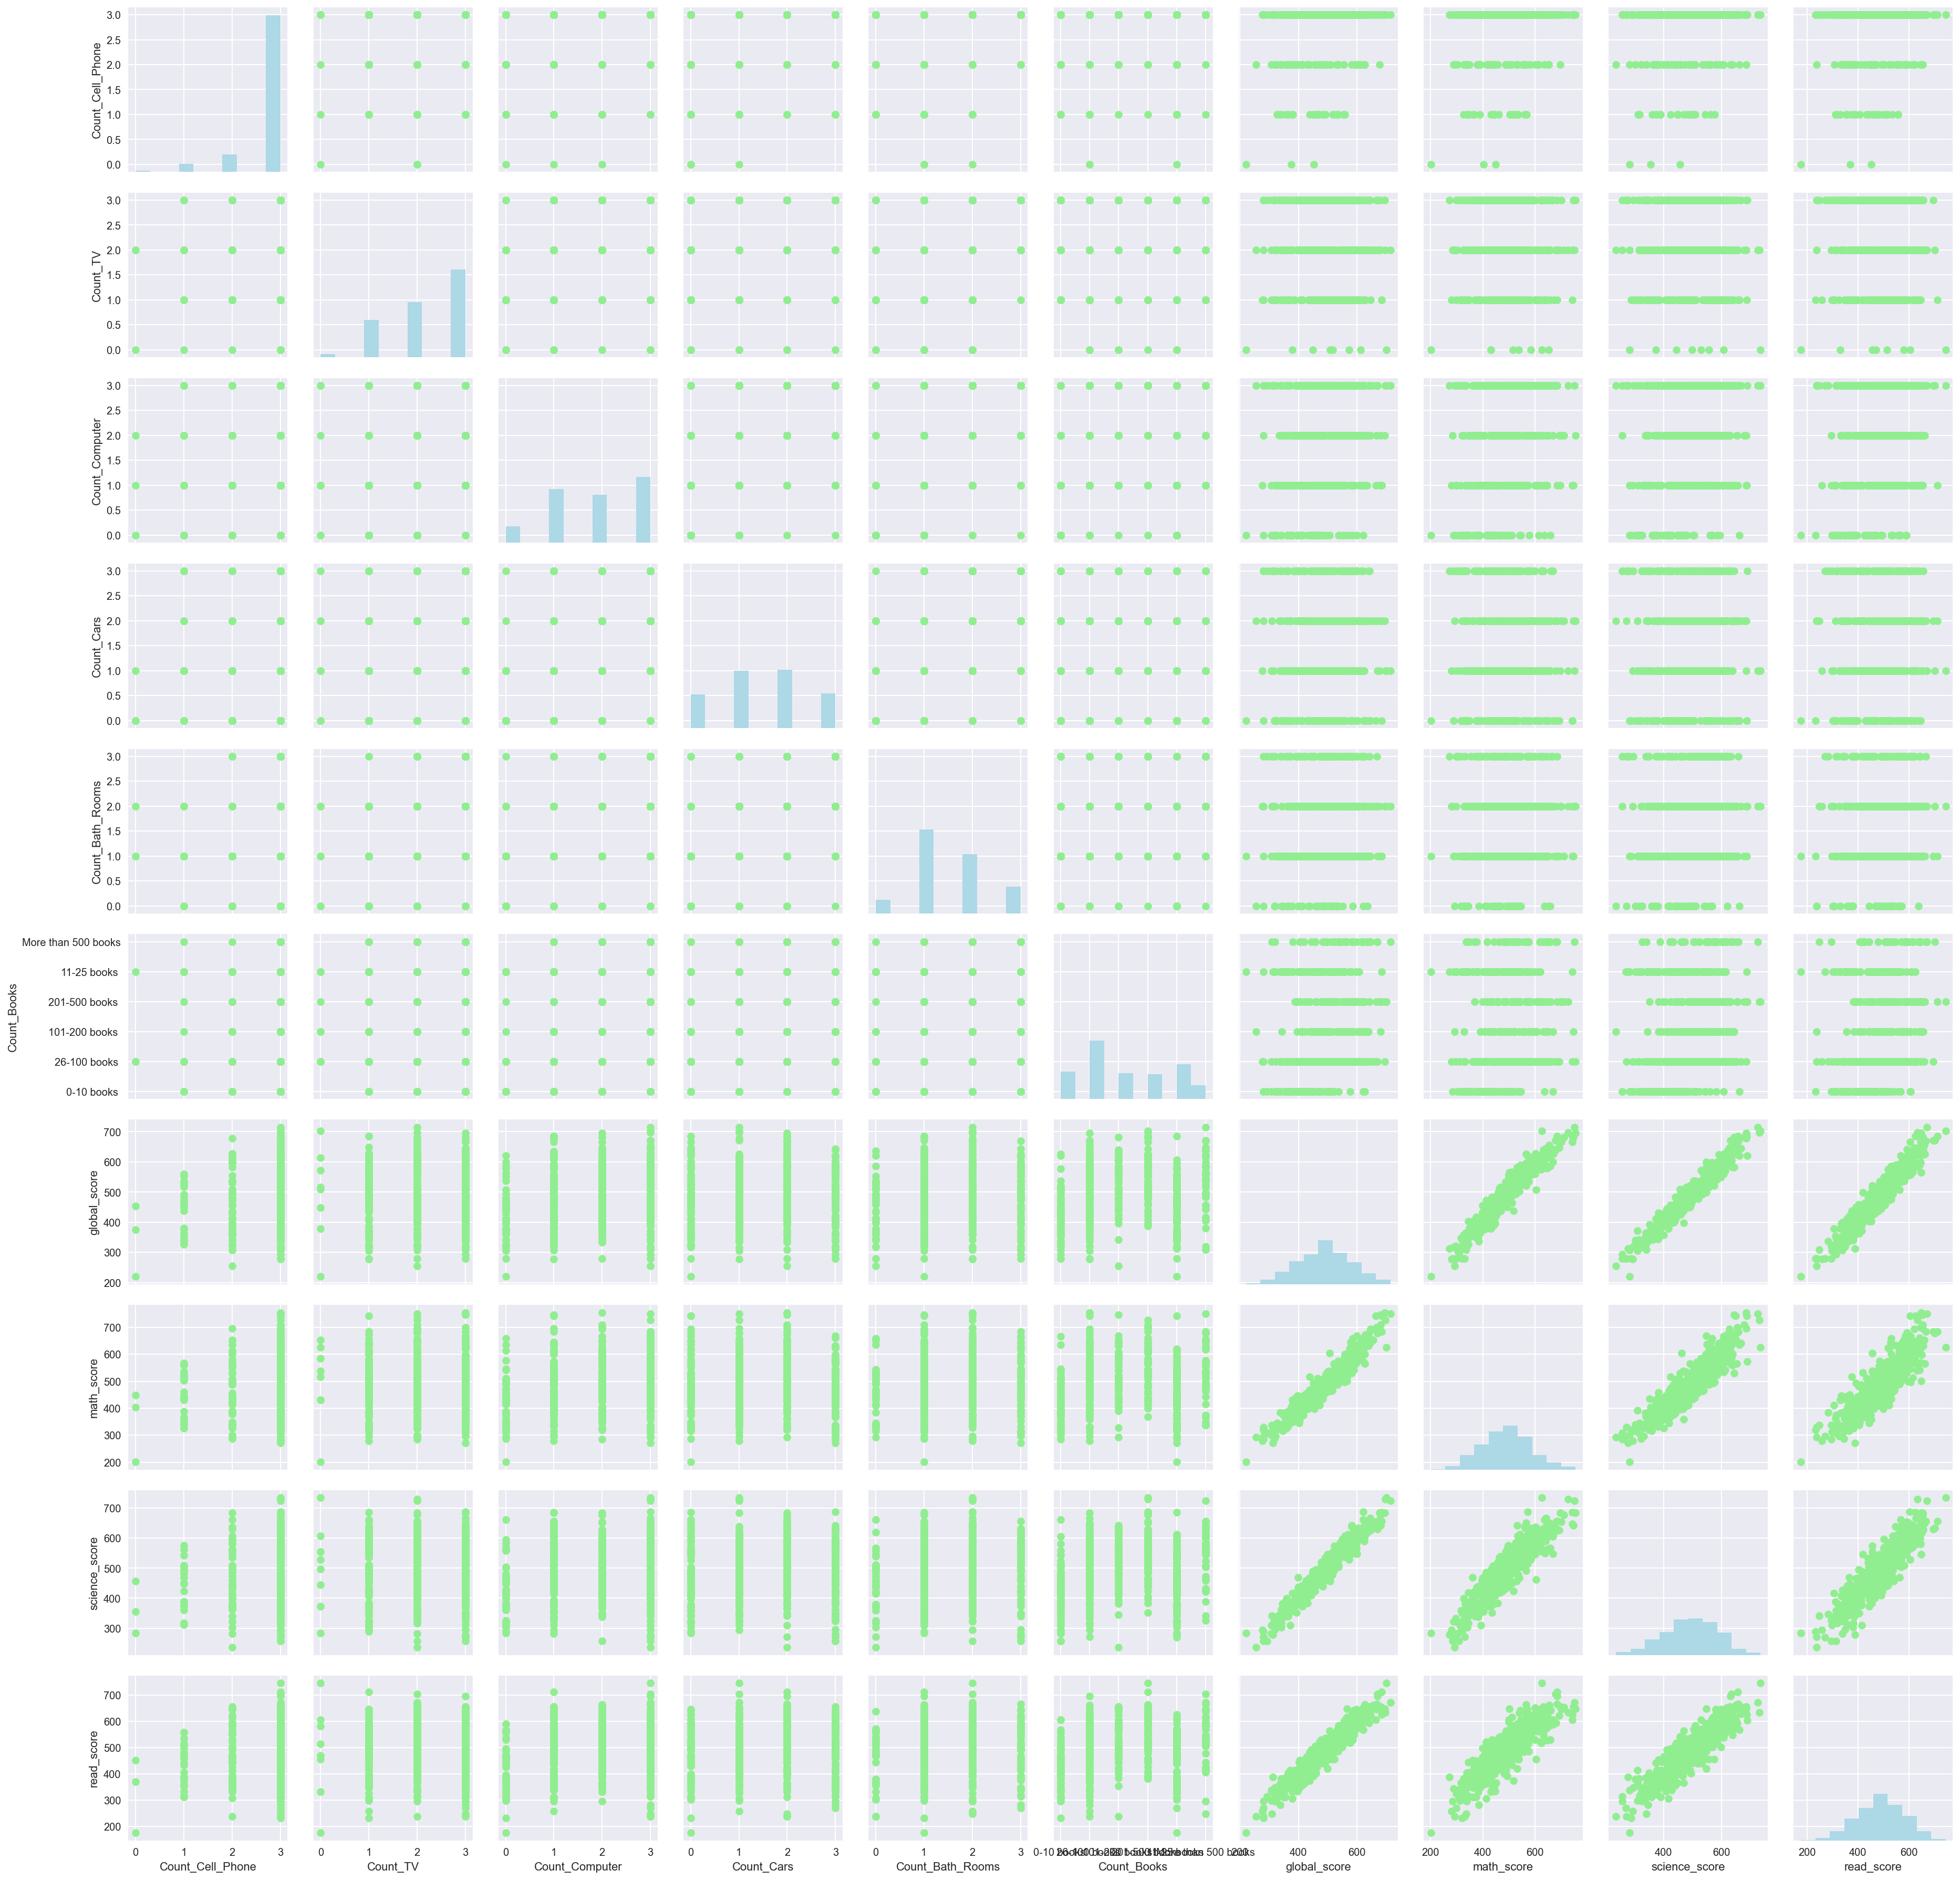

In [73]:
# in order to visualise the data faster, select 500 samples of it

pisa_subset = pisa.sample(500, replace=True)


# create a grid of plots, plot scatter plots at the non diagonal axes and histograms on the diagnoals
g = sns.PairGrid(data = pisa_subset, vars = variables);
g.map_diag(plt.hist, color="lightblue");
g.map_offdiag(plt.scatter, color="lightgreen");

In [74]:
pisa.Count_Books.dtype

CategoricalDtype(categories=['0-10 books ', '11-25 books ', '26-100 books ',
                  '101-200 books ', '201-500 books ', 'More than 500 books'],
                 ordered=True)

In [154]:
# in order to perform some statistical computations, convert the categorical book counts to numeric
# impute each categorical range with the mean of it
# CAVE this is also mathematically incorrect, it would most likely be better to use a (normal) distribution to impute the range of values


# create a new column with numeric values instead of ranges
pisa["Count_Books_Numeric"] = pisa["Count_Books"].replace({"0-10 books ": np.mean((0,10)),
                                 "11-25 books ": np.mean((11,25)),
                                 "26-100 books ": np.mean((26,100)),
                                 "101-200 books ": np.mean((101,200)),
                                 "201-500 books ": np.mean((201,500)),
                                 "More than 500 books": 501})
variables.append("Count_Books_Numeric")
pisa["Count_Books_Numeric"].head()

0      5.0
1    350.5
2    501.0
3     18.0
4    150.5
Name: Count_Books_Numeric, dtype: float64

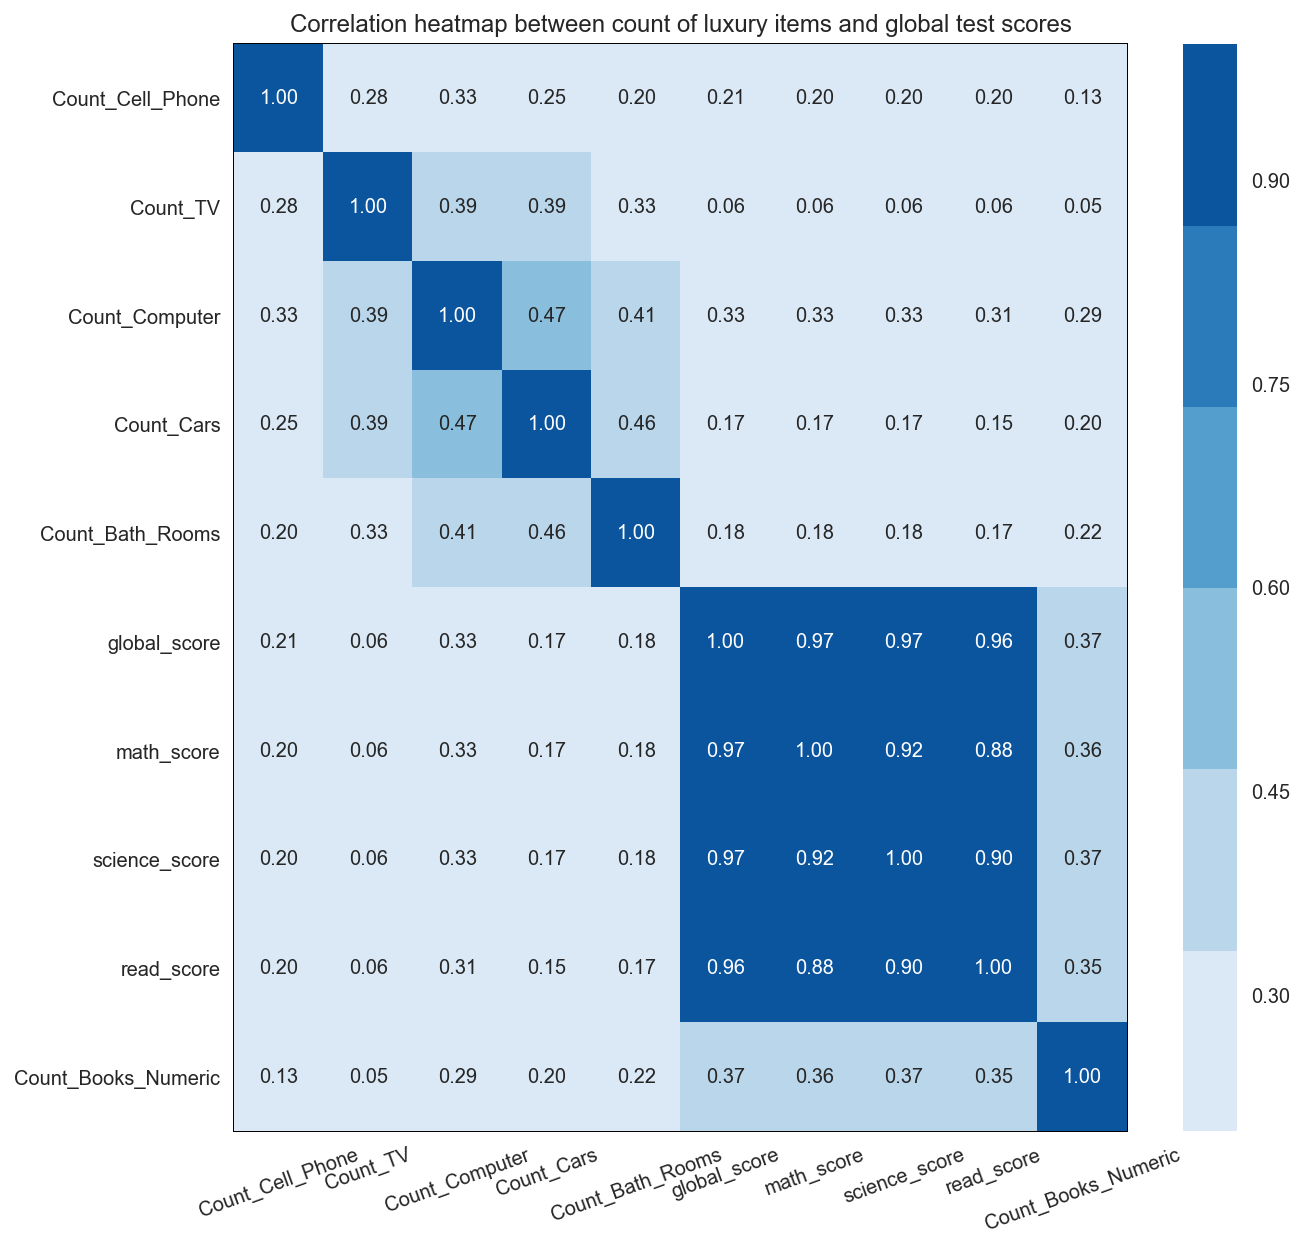

In [76]:
# create a heatmap showing the correlation of items between each other
# we are most interested in the correlation between the number of books and the overall test results (0.35-0.37)


palette = sns.color_palette("Blues")
plt.figure(figsize=(10,10))
fig = sns.heatmap(pisa[variables].corr(),
           cmap=palette, annot=True, fmt=".2f", vmin=0.2);
fig.patch.set_edgecolor("black");
fig.patch.set_linewidth("1")  
plt.title("Correlation heatmap between count of luxury items and global test scores")
plt.xticks(rotation = 20)
plt.savefig("Correlation_plot_possession_scores.png")

The number of books a student owns (converted to numeric) shows a correlation around 0.35-0.37 to the test results. This is not much, but still a lot better than most of the other variables (0.05 - 0.2) for most. Not unexpectedly we also can see that the strongest relations fall for the different disciplines. So students, good in math are most likely also performing great in science and vice versa.

---
<a id='Books_vs_results'></a>
9. **Trends:** Do students with more books achieve better results?  

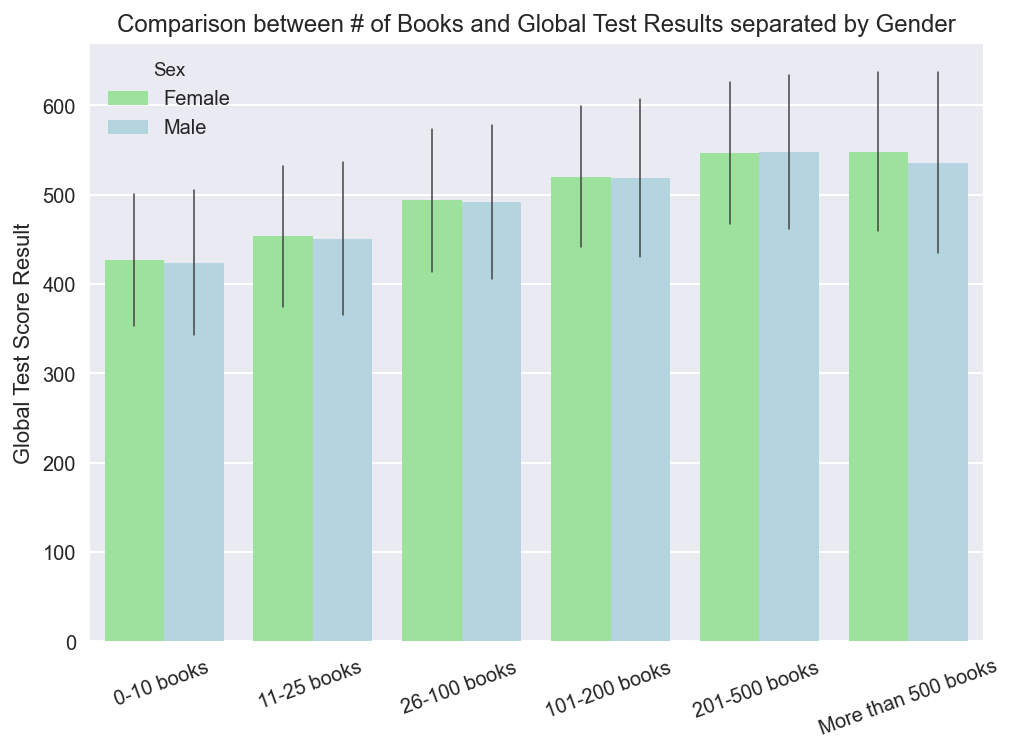

In [155]:
# Create a barplot showing how well students (split by gender) perform in the PISA2012 dataset depending on the amount of books they own
sns.barplot(data=pisa, x="Count_Books", y="global_score", palette=["lightgreen", "lightblue"], ci="sd", hue="Sex", errwidth = 0.75);
plt.xlabel(None);
plt.xticks(rotation=20)
plt.ylabel("Global Test Score Result");
plt.title("Comparison between # of Books and Global Test Results separated by Gender");
plt.savefig("Books_Global_Scores.png")

**`Key findings`**  
Not surprisingly, the number of books shows a linear trend to simultaneously rise when test scores rise. As we cannot conclude any direction from the data, it is however obvious that the more books students will own, the more likely they will acquire knowledge while reading them and gain better test scores.

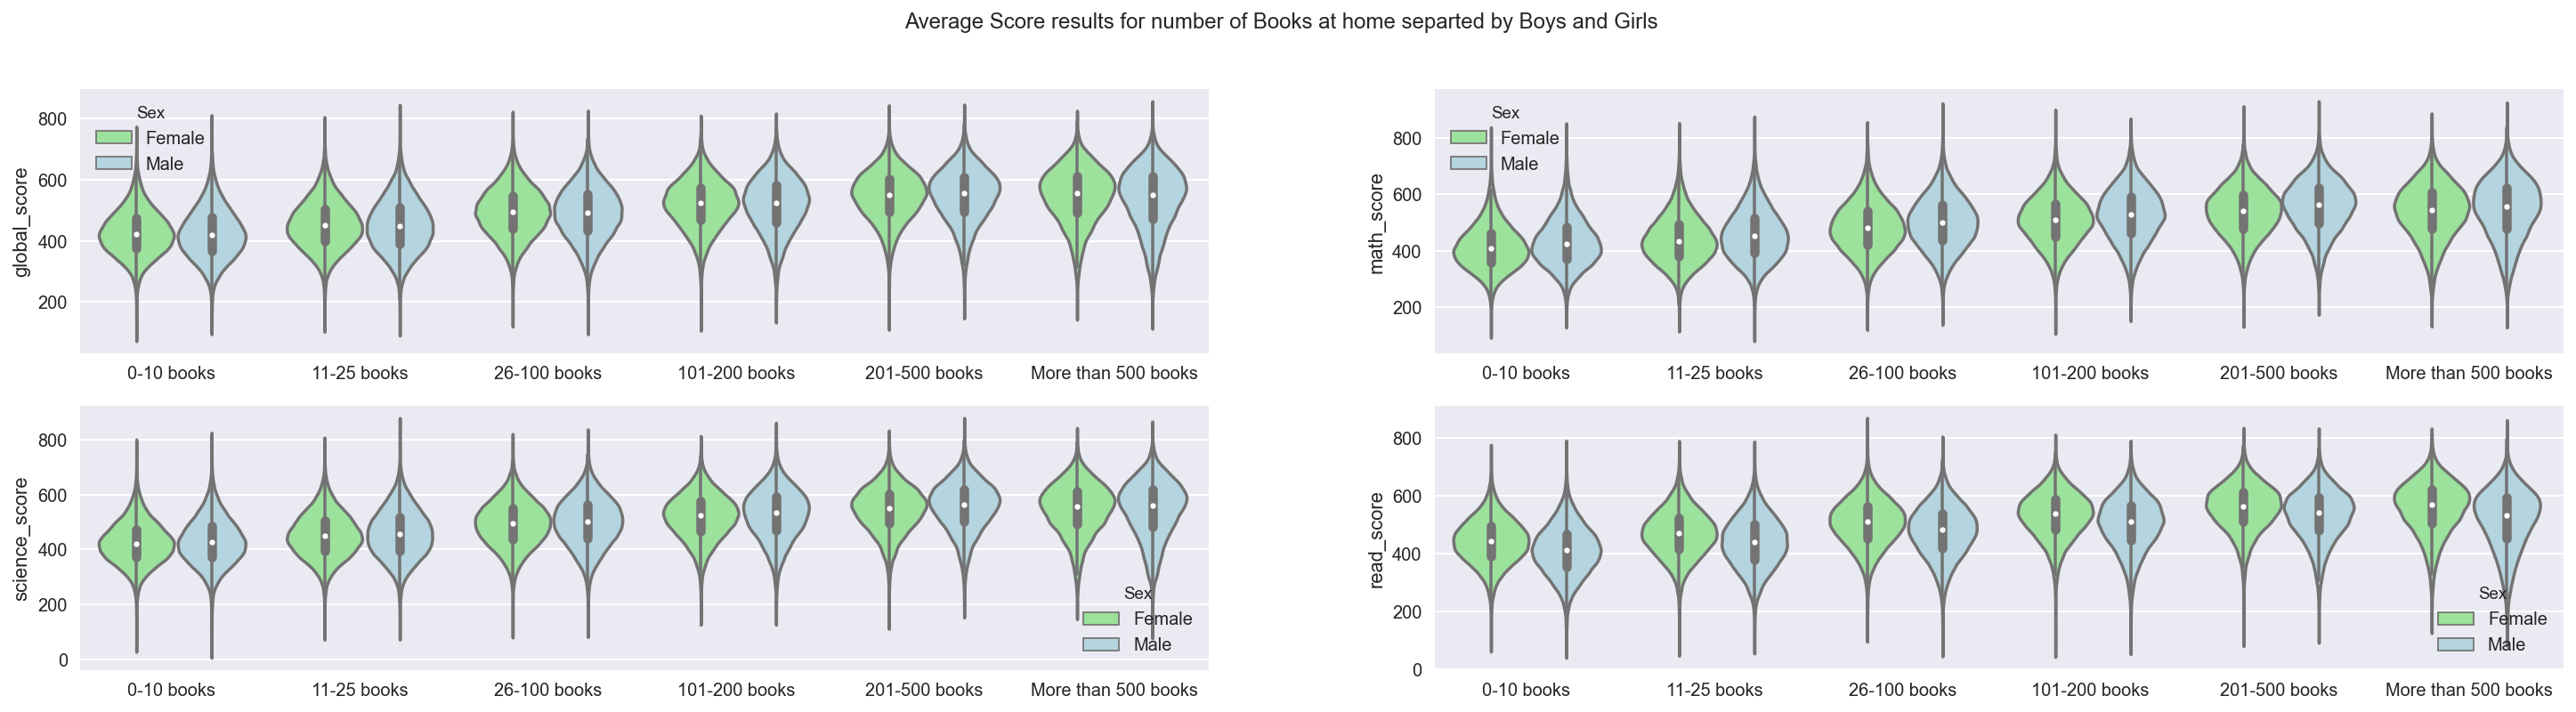

In [156]:
# some more exploration to see if the result from before is somewhat different for the varying disciplines (science, math, languages)
# however this appears to be a global trend

plt.figure(figsize=(25,6))
plt.suptitle("Average Score results for number of Books at home separted by Boys and Girls");

plt.subplot(2,2,1);
sns.violinplot(data=pisa, x="Count_Books", y="global_score", hue="Sex", palette=["lightgreen", "lightblue"]);
plt.xlabel(None);

plt.subplot(2,2,2);
sns.violinplot(data=pisa, x="Count_Books", y="math_score", hue="Sex", palette=["lightgreen", "lightblue"]);
plt.xlabel(None);

plt.subplot(2,2,3);
sns.violinplot(data=pisa, x="Count_Books", y="science_score", hue="Sex", palette=["lightgreen", "lightblue"]);
plt.xlabel(None);

plt.subplot(2,2,4);
sns.violinplot(data=pisa, x="Count_Books", y="read_score", hue="Sex", palette=["lightgreen", "lightblue"]);
plt.xlabel(None);

plt.savefig("Avg_scores_hueGender_books.png")

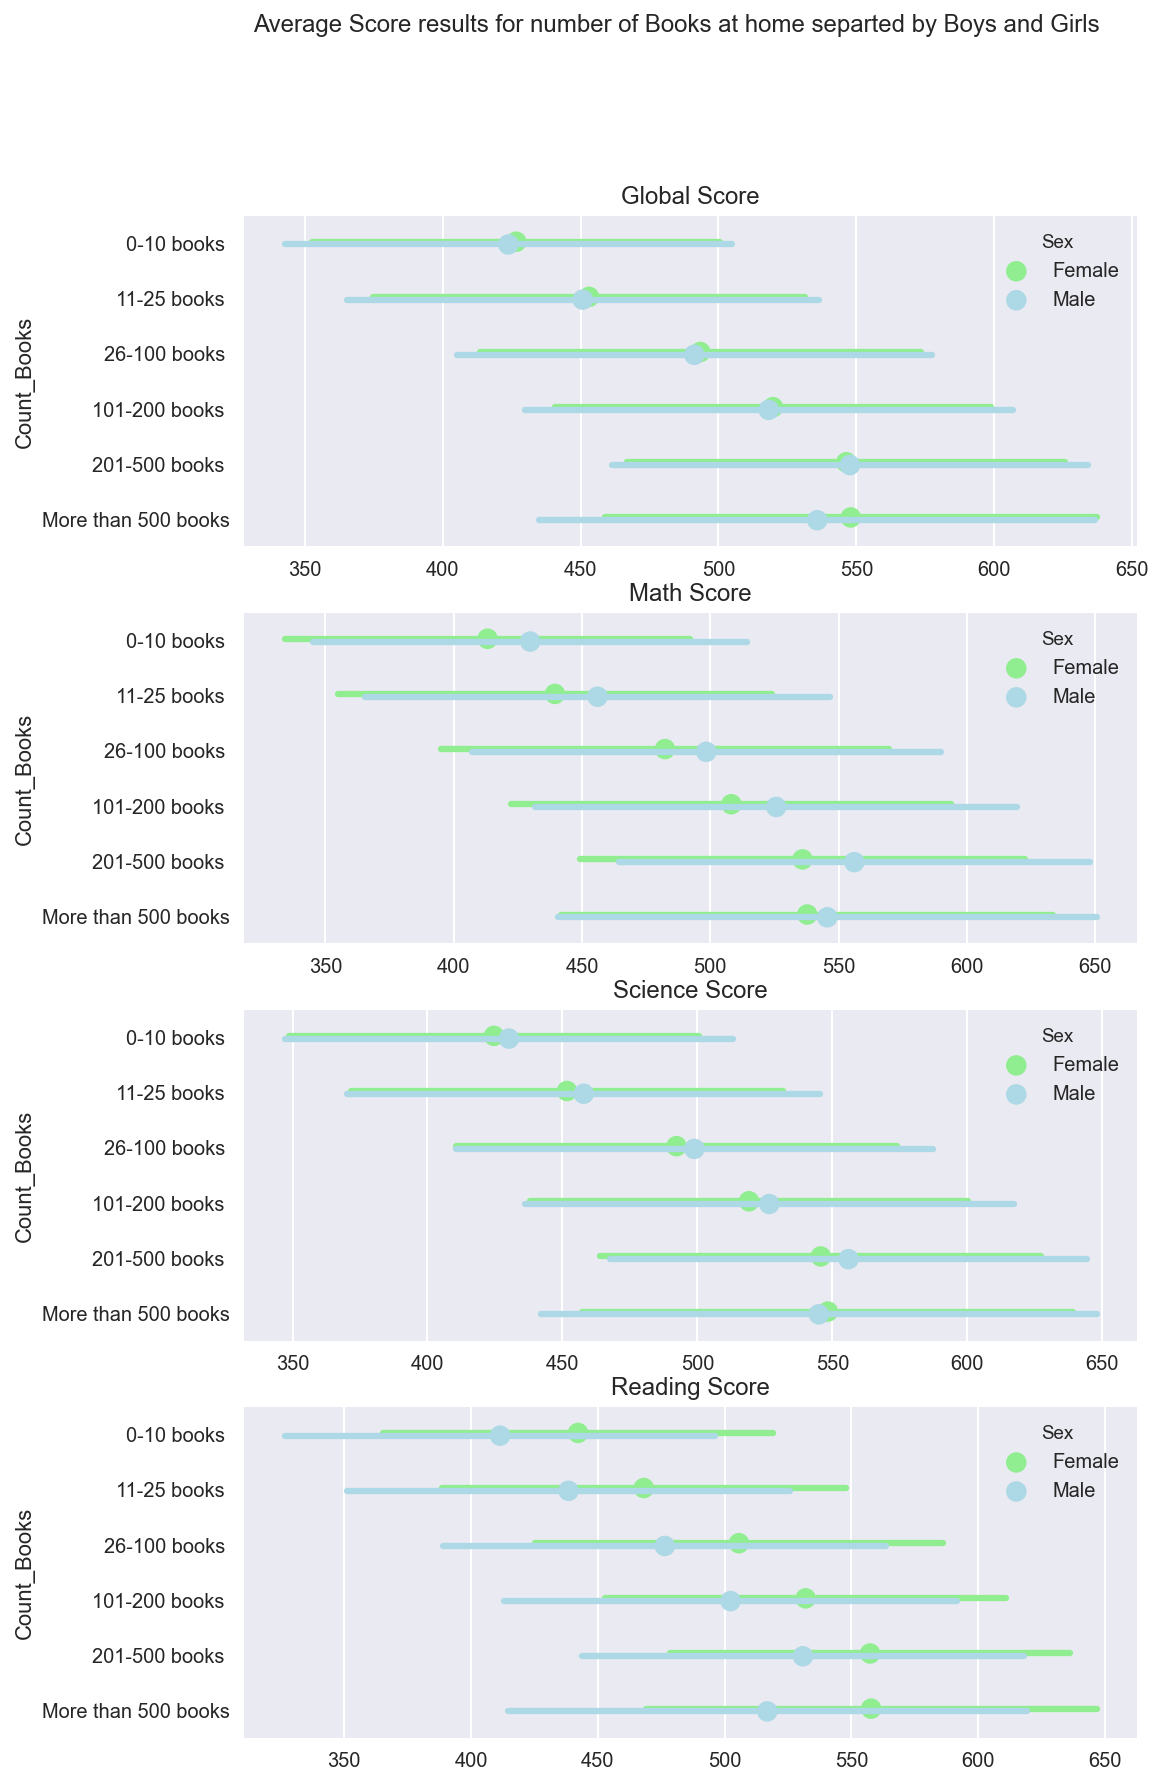

In [79]:
plt.figure(figsize=(8,14))
plt.suptitle("Average Score results for number of Books at home separted by Boys and Girls");

plt.subplot(4,1,1);
sns.pointplot(data=pisa, y="Count_Books", x="global_score", hue="Sex", palette=["lightgreen", "lightblue"], ci="sd", linestyles = "", dodge=True);
plt.xlabel(None);
plt.title("Global Score");

plt.subplot(4,1,2);
sns.pointplot(data=pisa, y="Count_Books", x="math_score", hue="Sex", palette=["lightgreen", "lightblue"], ci="sd", linestyles = "", dodge=True);
plt.xlabel(None);
plt.title("Math Score");

plt.subplot(4,1,3);
sns.pointplot(data=pisa, y="Count_Books", x="science_score", hue="Sex", palette=["lightgreen", "lightblue"], ci="sd", linestyles = "", dodge=True);
plt.xlabel(None);
plt.title("Science Score");

plt.subplot(4,1,4);
sns.pointplot(data=pisa, y="Count_Books", x="read_score", hue="Sex", palette=["lightgreen", "lightblue"], ci="sd", linestyles = "", dodge=True);
plt.xlabel(None);
plt.title("Reading Score");

plt.savefig("Avg_scores_hueGender_books_pointplot.png")

---
<a id='Truancy'></a>
10. **Trends:** Are truants doing worse in tests than those who never miss school?

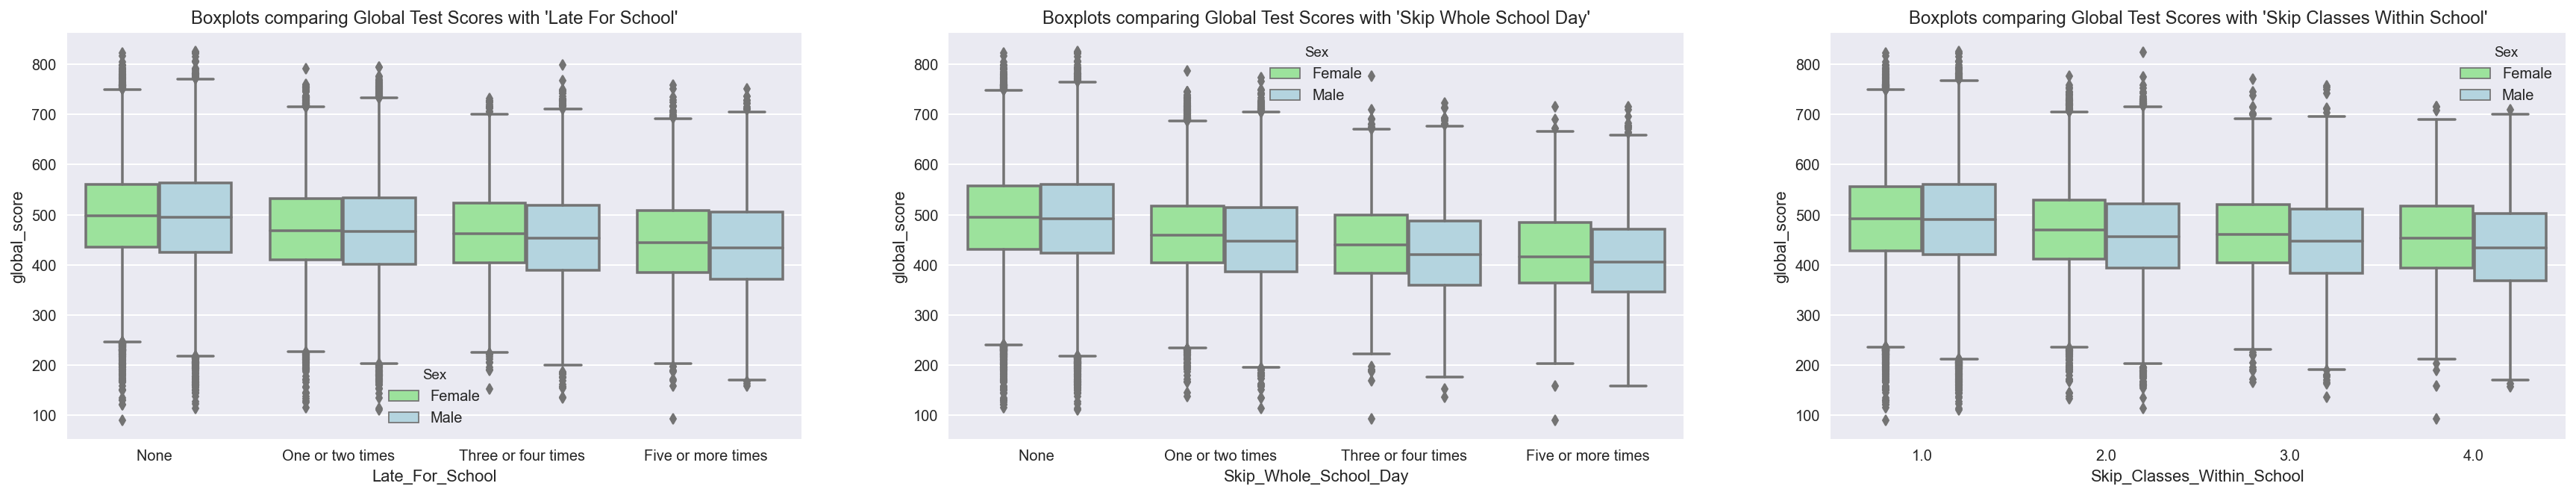

In [157]:
# I next wanted to focus on the second question of interest. I almost never missed school beeing afraid I could miss important classes and perform worse in my tests. 
# Here are some boxplots, showing the distribution of grades depending on wheter students skip school lessons, or are too late for class.

axes = []
nrows = 1
ncols = 3

fig = plt.figure(figsize=(30,5))

for idx, col in enumerate(truancy):
    axes.append(fig.add_subplot(nrows, ncols, idx+1))
    plt.title("Boxplots comparing Global Test Scores with '{}'".format(col.replace("_", " ")))
    sns.boxplot(data=pisa, x=col, y="global_score", hue="Sex", palette=["lightgreen", "lightblue"])
    
plt.savefig("Truancy_Scores_Boxplot.png")

**`Key findings`**  
Interestingly, students beeing late for school, skipping classes or whole school days appear to linearly achieve worse results than those who never miss school (None). This trend is equal among girls and boys.

---
<a id='SmartestCountries'></a>
11. **Trends:** From which countries are the best students coming from?
This is an additional question of interest. In Germany I have the feeling that we always consider us at the lower end of the PISA results. So is this true?

In [158]:
grouped = pisa.groupby("Country_Code")[["global_score", "math_score", "read_score", "science_score"]]

In [160]:
# perform some test statistic
# the .agg( ) method allows us to perform statistical computations all @ once
grouped.agg(["mean", "median", "std"])

global_score                         math_score  \
                                 mean      median        std        mean   
Country_Code                                                               
Albania                    396.719697  402.147420  88.274916  394.746217   
Argentina                  423.856345  424.375733  76.155280  414.185621   
Australia                  518.475032  520.304827  89.423959  509.388404   
Austria                    513.621297  517.820480  80.648121  518.007550   
Belgium                    531.051761  538.807393  87.886315  536.355786   
...                               ...         ...        ...         ...   
United Arab Emirates       451.424692  450.619887  84.070116  444.163179   
United Kingdom             515.292547  516.633207  81.721482  505.232681   
United States of America   502.147153  501.351153  83.687967  490.746849   
Uruguay                    438.225009  436.649613  77.878517  434.493752   
Vietnam                    520.961851  522.245867  68.807115  516.692616   

                                                read_score             \
                             median        std        mean     median   
Country_Code                                                            
Albania                   396.17542  85.389452  396.190101  402.35768   
Argentina                 413.85730  72.958209  426.301706  429.56686   
Australia                 508.73188  91.602060  518.052115  522.26286   
Austria                   518.70232  85.515841  503.654768  510.25940   
Belgium                   540.82410  93.399068  529.778358  538.54620   
...                             ...        ...         ...        ...   
United Arab Emirates      439.25066  84.651005  451.764182  455.32614   
United Kingdom            504.75932  83.637721  514.252312  516.70266   
United States of America  487.15530  85.151639  508.367090  510.74058   
Uruguay                   431.30550  79.738619  437.178559  436.72102   
Vietnam                   515.35286  79.945191  513.332775  516.19381   

                                     science_score                        
                                 std          mean     median        std  
Country_Code                                                              
Albania                   103.826415    399.222773  404.45731  89.336969  
Argentina                  88.441046    431.081708  432.15218  79.080046  
Australia                  90.728018    527.984576  531.08914  94.427579  
Austria                    82.312440    519.201573  523.44276  83.436392  
Belgium                    90.261947    527.021139  535.75158  89.969356  
...                              ...           ...        ...        ...  
United Arab Emirates       89.009762    458.346714  456.49012  87.750394  
United Kingdom             82.270576    526.392648  527.91870  86.684422  
United States of America   84.470386    507.327520  508.14994  87.946118  
Uruguay                    82.220391    443.002715  443.24880  83.409308  
Vietnam                    66.161097    532.860162  535.47182  70.729529  

[67 rows x 12 columns]

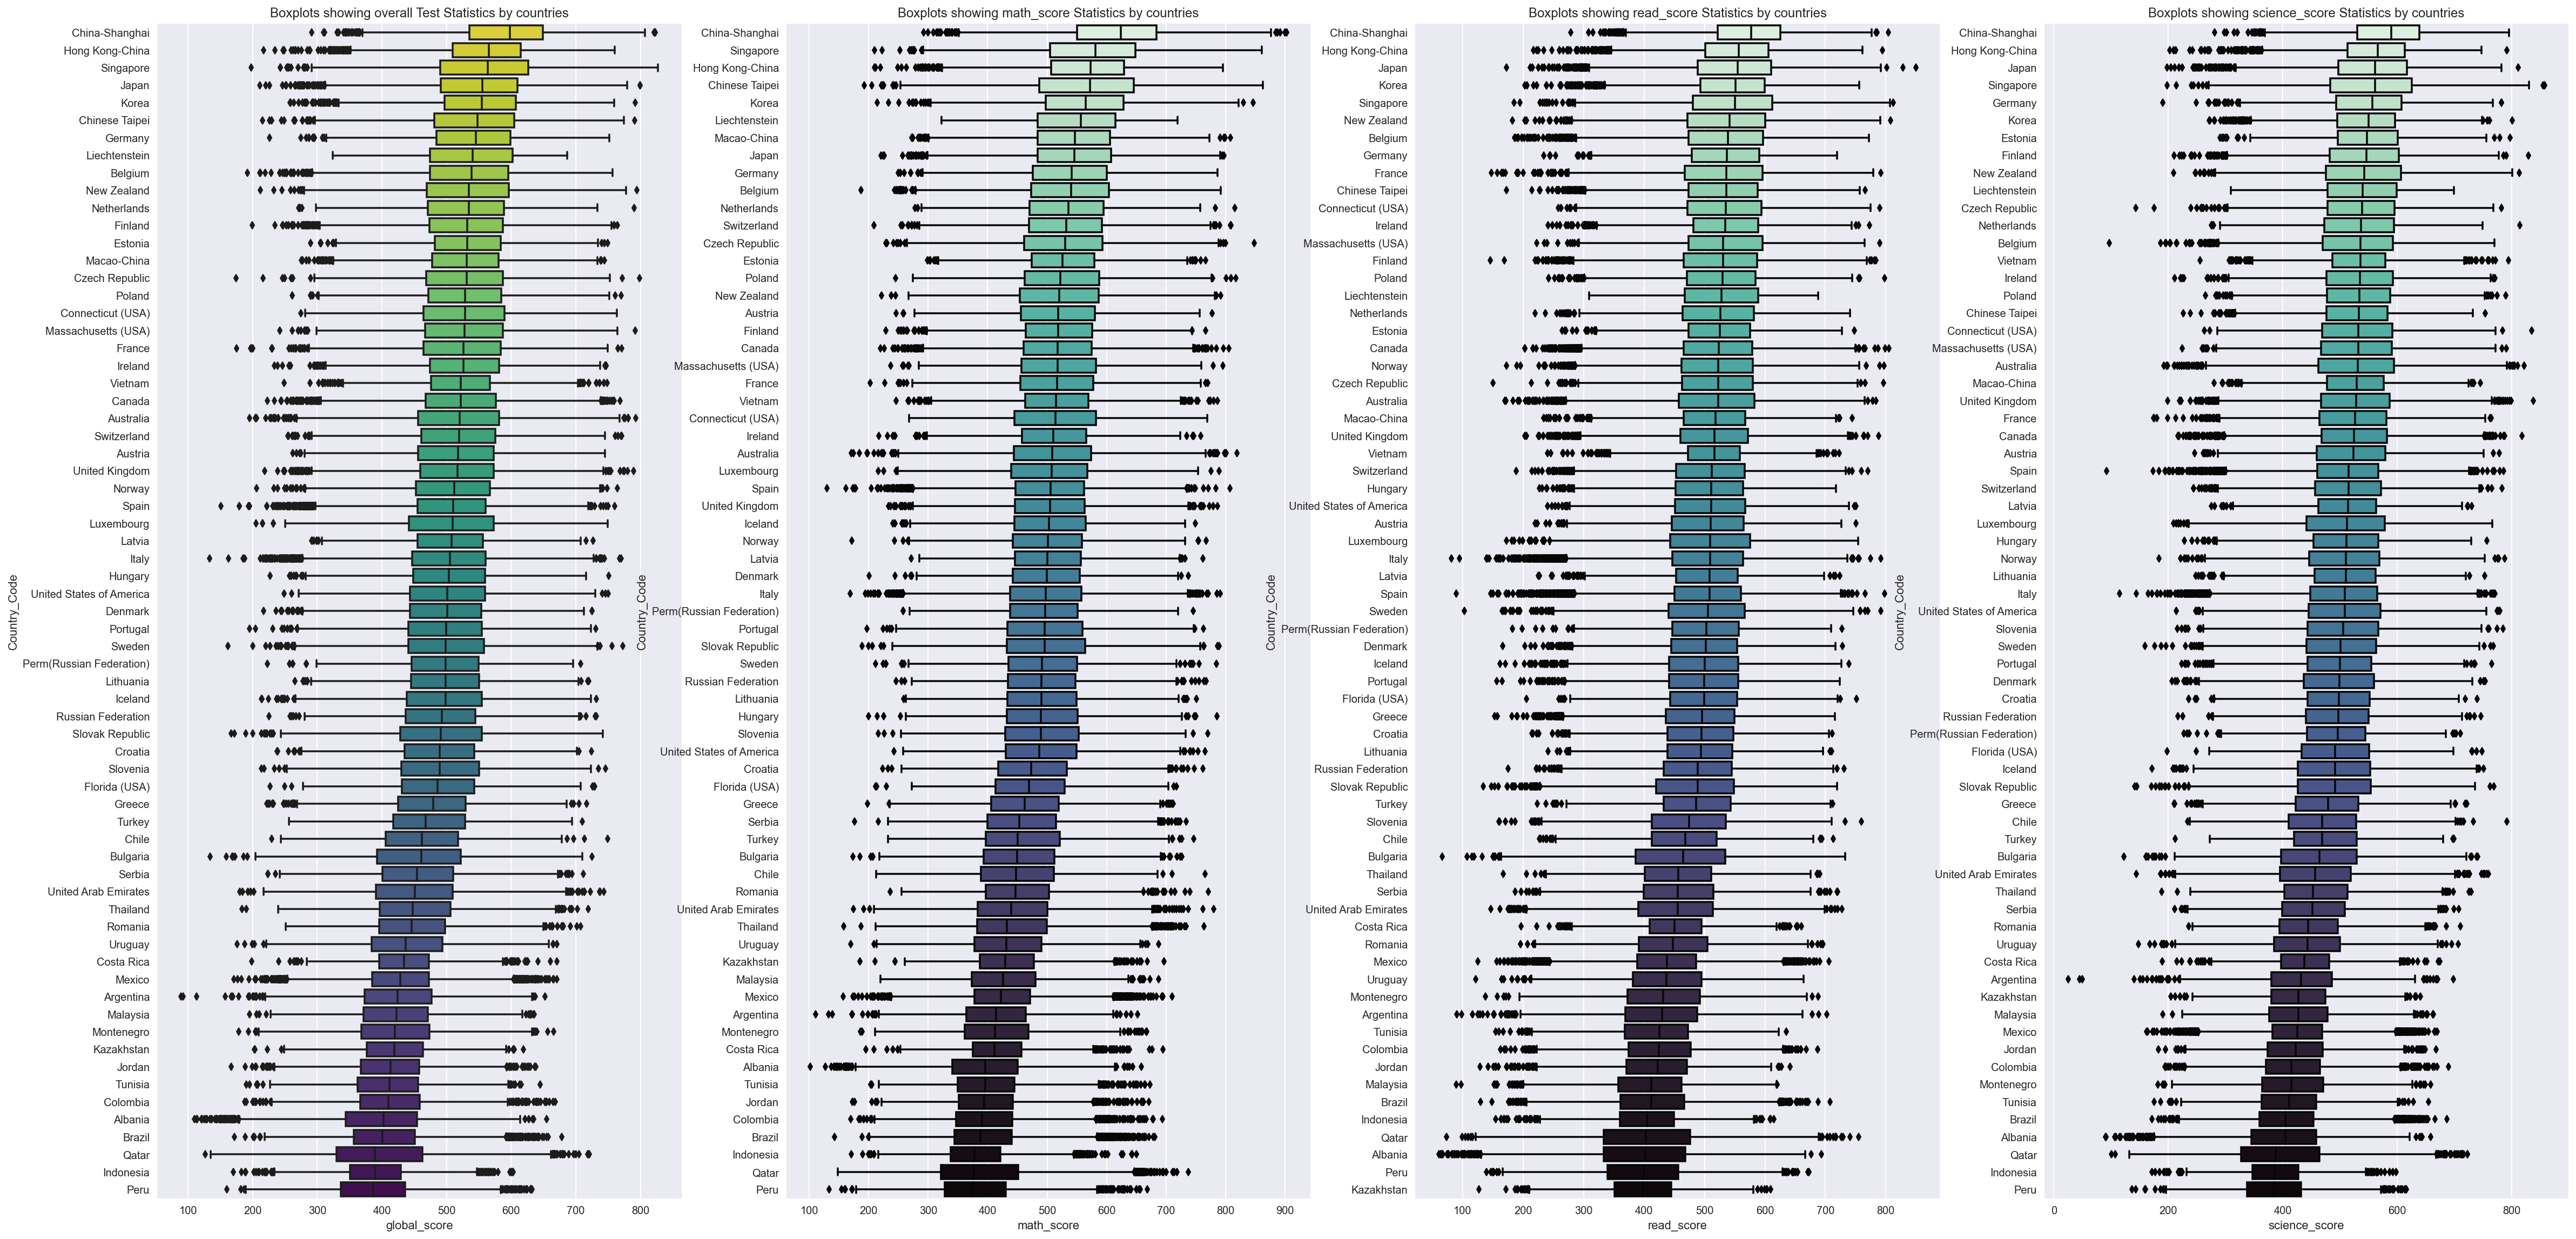

In [161]:
# finally visualise the results in form of boxplots for the overall test result and the ones seperated by discipline (Science, math, reading)
plt.figure(figsize=(40,20));

plt.subplot(1,4,1)
top_ranking = pisa.groupby("Country_Code")["global_score"].median().sort_values(ascending=False).index
plt.title("Boxplots showing overall Test Statistics by countries")
sns.boxplot(data=pisa, y="Country_Code", x="global_score", order=top_ranking, palette="viridis_r");

plt.subplot(1,4,2)
top_ranking = pisa.groupby("Country_Code")["math_score"].median().sort_values(ascending=False).index
plt.title("Boxplots showing math_score Statistics by countries")
sns.boxplot(data=pisa, y="Country_Code", x="math_score", order=top_ranking, palette="mako_r");

plt.subplot(1,4,3)
top_ranking = pisa.groupby("Country_Code")["read_score"].median().sort_values(ascending=False).index
plt.title("Boxplots showing read_score Statistics by countries")
sns.boxplot(data=pisa, y="Country_Code", x="read_score", order=top_ranking, palette="mako_r");

plt.subplot(1,4,4)
top_ranking = pisa.groupby("Country_Code")["science_score"].median().sort_values(ascending=False).index
plt.title("Boxplots showing science_score Statistics by countries")
sns.boxplot(data=pisa, y="Country_Code", x="science_score", order=top_ranking, palette="mako_r");


plt.savefig("Boxplots_Best_Countries.png")

In [163]:
# create a top10_ranking to plot for the explanatory data viz later

top10_ranking = pisa.groupby("Country_Code")["global_score"].median().sort_values(ascending=False).index[:10]
top10_ranking

Index(['China-Shanghai', 'Hong Kong-China', 'Singapore', 'Japan', 'Korea',
       'Chinese Taipei', 'Germany', 'Liechtenstein', 'Belgium', 'New Zealand'],
      dtype='object', name='Country_Code')

In [164]:
# now subset the dataframe
top10 = pisa[pisa.Country_Code.isin(top10_ranking)]
top10.shape

(41597, 62)

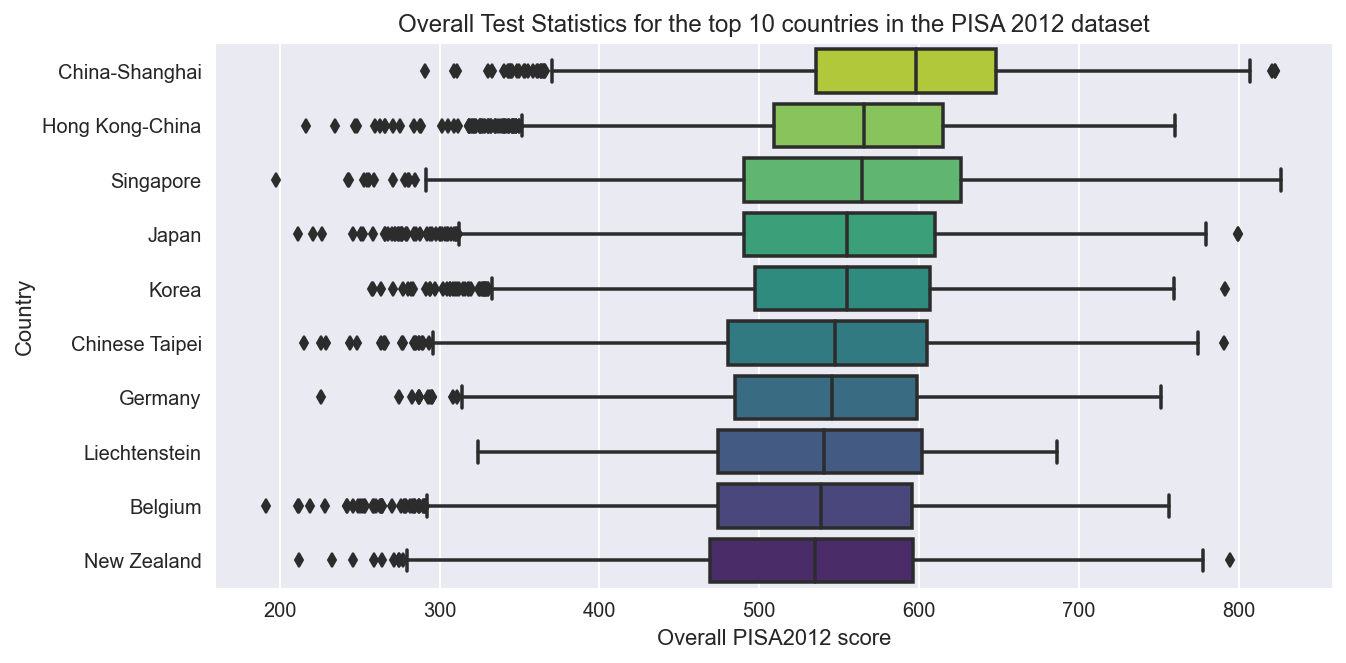

In [169]:
# visualise the top 10 countries

plt.figure(figsize=(10,5));

plt.title("Overall Test Statistics for the top 10 countries in the PISA 2012 dataset")
sns.boxplot(data=top10, y="Country_Code", x="global_score", order=top10_ranking, palette="viridis_r");
plt.ylabel("Country")
plt.xlabel("Overall PISA2012 score")
plt.savefig("Top_10_countries.png")

**`Key findings`**  
Not unexpectedly the top students come from regions in China. My country (Germany) however isn't that bad as always considered by ourselves, always beeing represented in the top 10.

In [162]:
pisa.to_csv("pisa_cleaned_df.csv", index=False)